# Titanic Survial Prediction

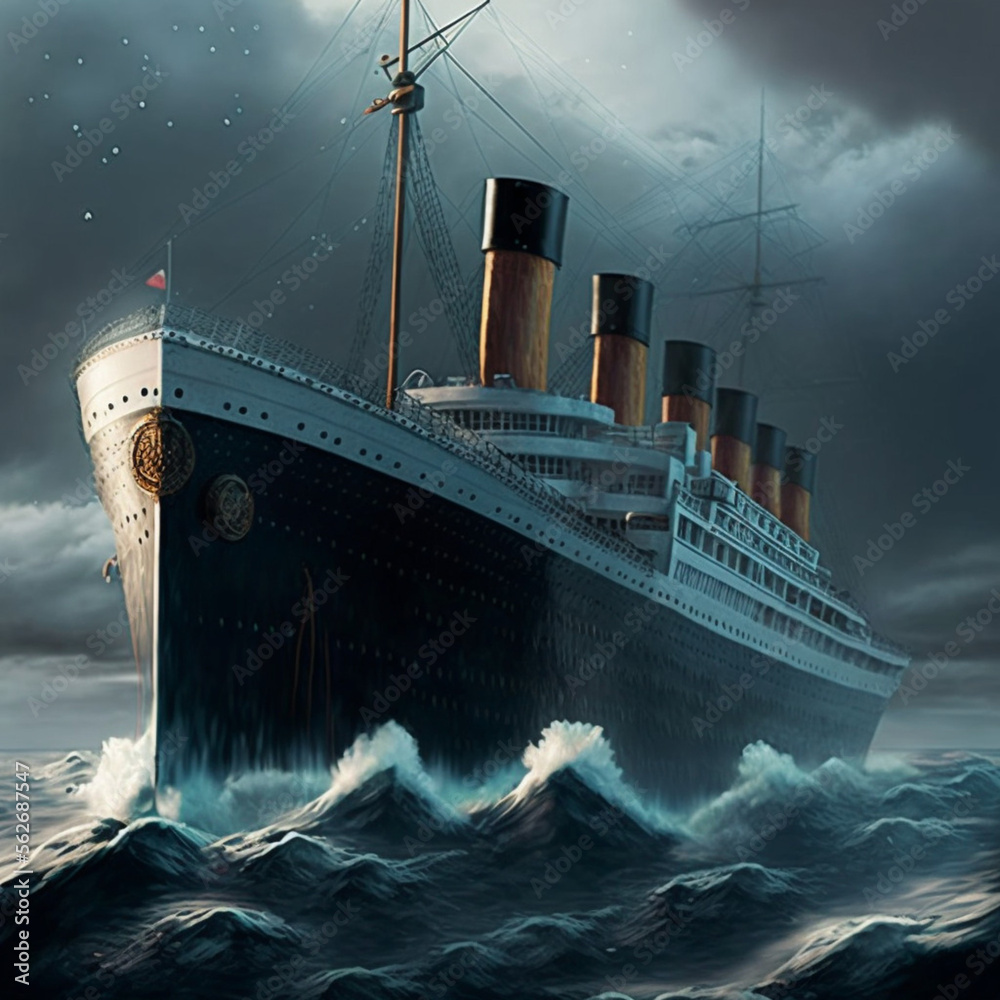

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df=df.drop(['Cabin'],axis=1)

In [13]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [14]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [15]:
object_columns=df.select_dtypes(include='object').columns.tolist()
numerical_columns=df.select_dtypes(include=['int','float']).columns.tolist()

print("Object columns: " , object_columns)
print('\n')
print("numerical_columns: ", numerical_columns)

Object columns:  ['Sex', 'Embarked']


numerical_columns:  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [24]:
#Imputation
for features in numerical_columns:
    df[features].fillna(df[features].mean(),inplace= True)
    
for feature in object_columns:
    df[feature].fillna(df[feature].mode()[0],inplace=True)

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [27]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [29]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [30]:
for i in object_columns:
    print(i)
    print(df[i].unique())
    print('\n')

Sex
['male' 'female']


Embarked
['S' 'C' 'Q']




In [31]:
for i in object_columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

Sex
male      577
female    314
Name: Sex, dtype: int64


Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64




In [34]:
for i in numerical_columns:
    print(i)
    print(df[i].unique())
    print('\n')

Survived
[0 1]


Pclass
[3 1 2]


Age
[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42       34.5        

In [35]:
for i in numerical_columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

Survived
0    549
1    342
Name: Survived, dtype: int64


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64




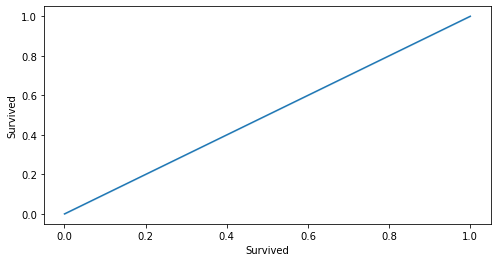

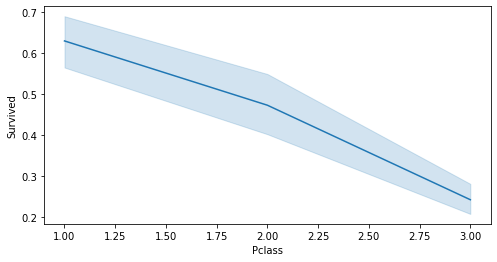

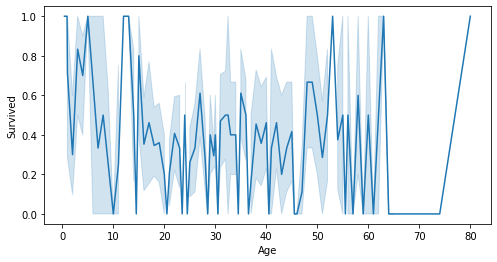

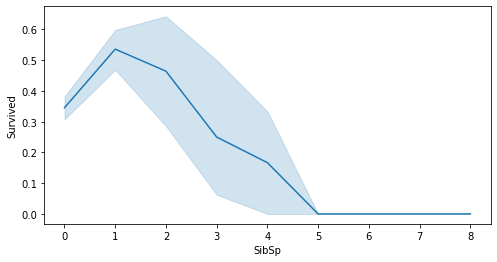

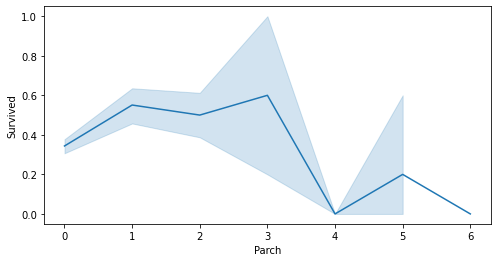

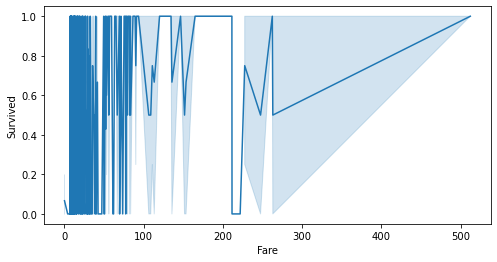

In [37]:
for i in numerical_columns:
        plt.figure(figsize=(8,4))
        sns.lineplot(x=df[i],y=df['Survived'],data=df,palette='hls')          
        plt.show() 

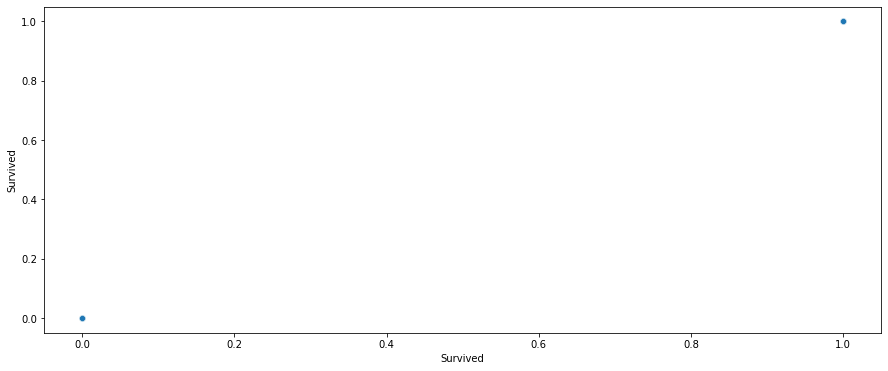

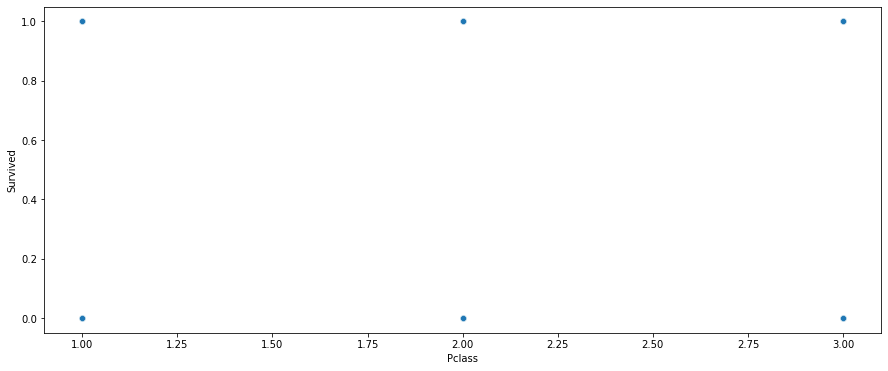

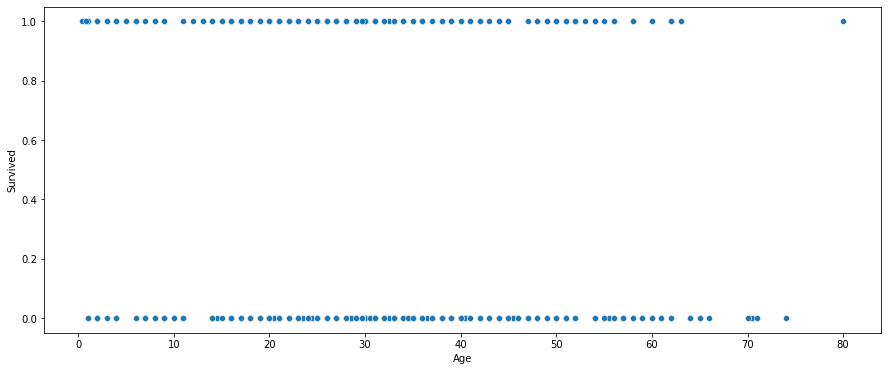

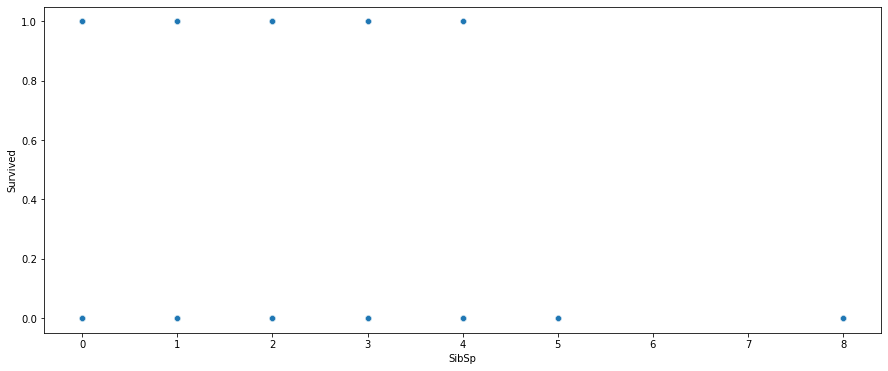

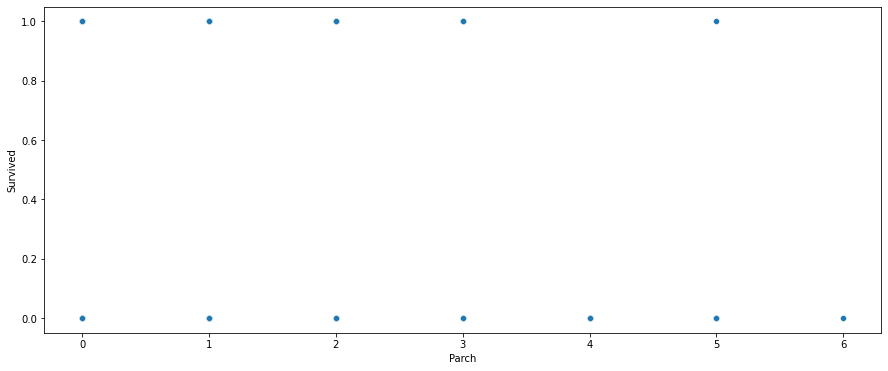

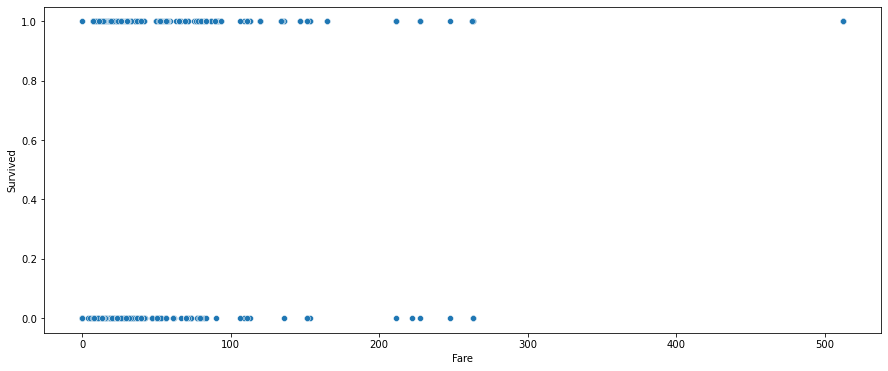

In [39]:
for i in numerical_columns:
    
        plt.figure(figsize=(15,6))
        sns.scatterplot(x=df[i],y=df['Survived'],data=df,palette='hls')
        plt.show()
        

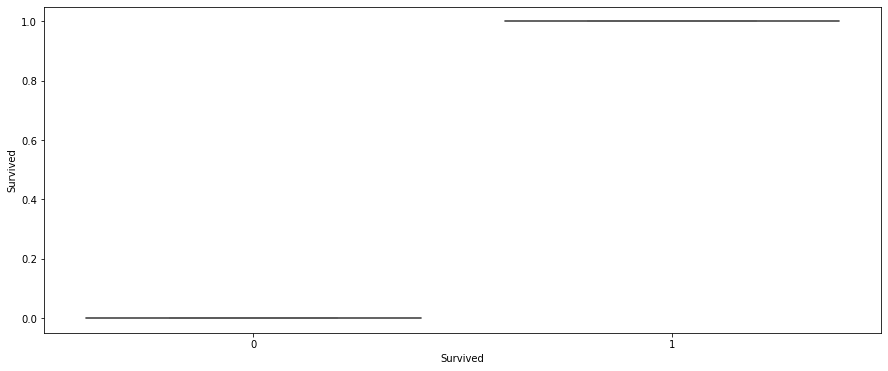

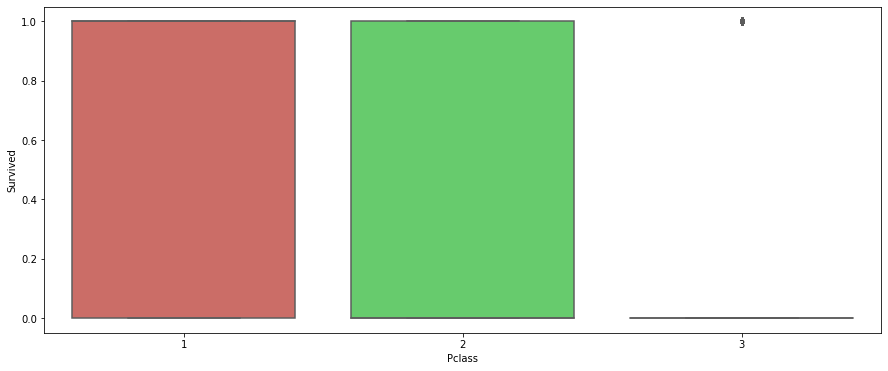

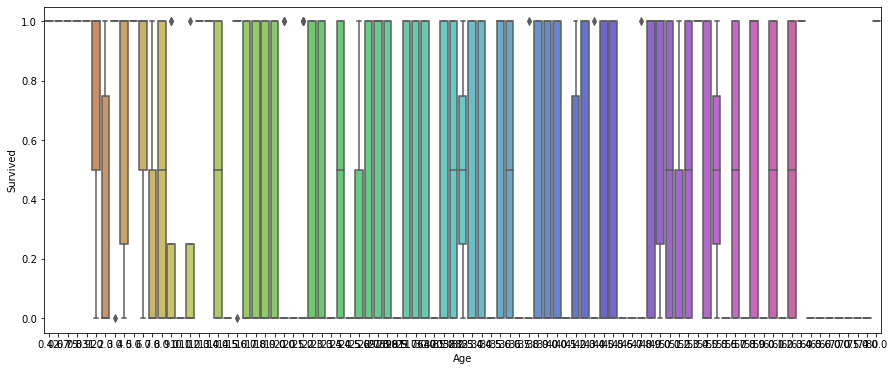

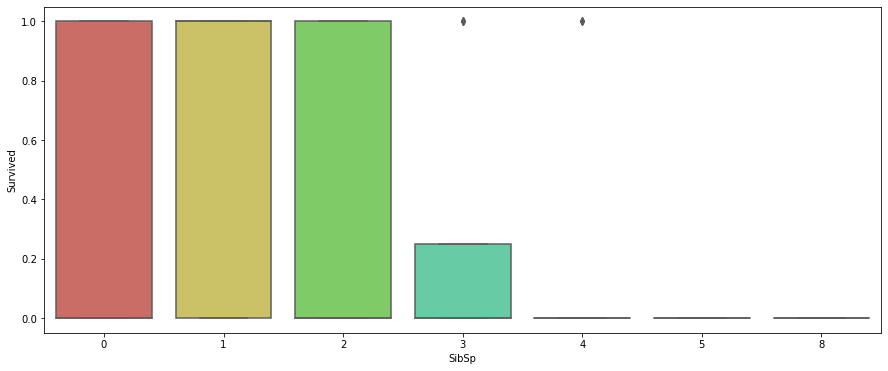

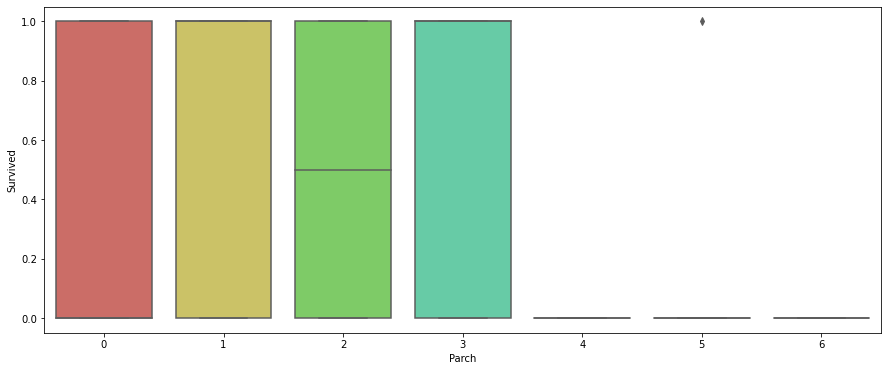

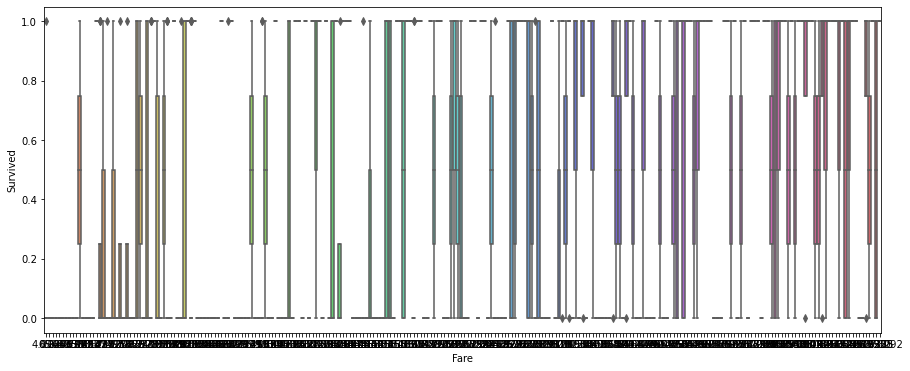

In [40]:
for i in numerical_columns:
    
        plt.figure(figsize=(15,6))
        sns.boxplot(x=df[i],y=df['Survived'],data=df,palette='hls')
        plt.show()
        

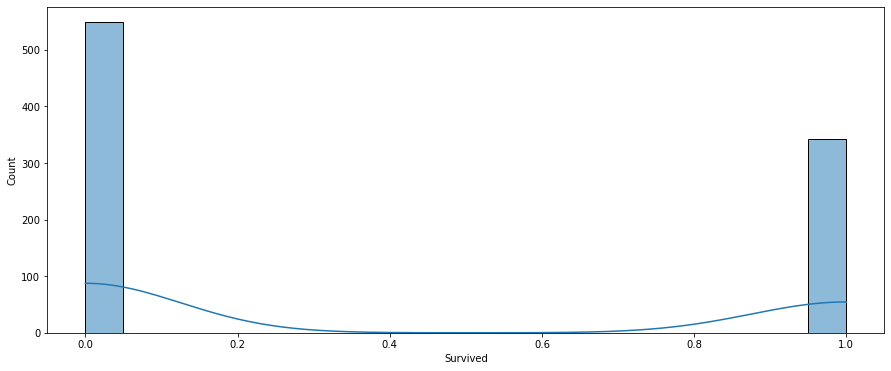

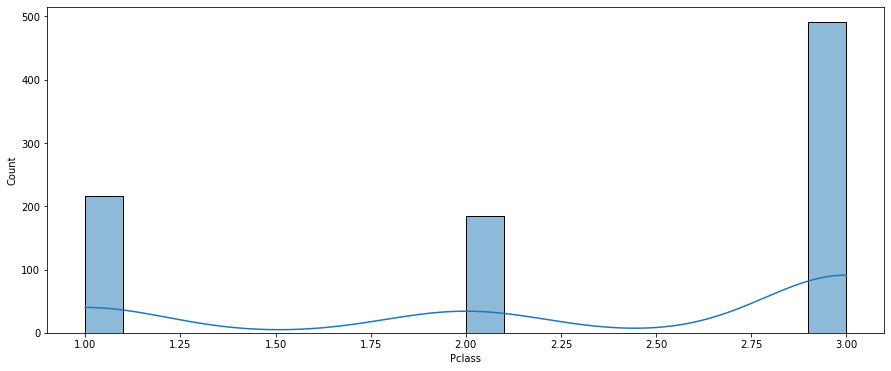

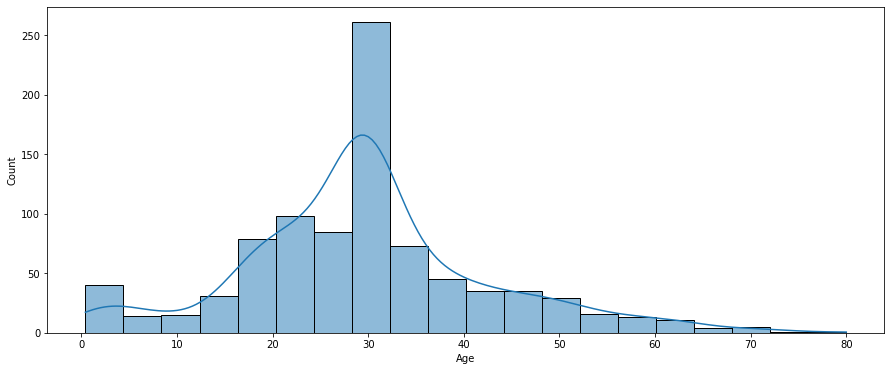

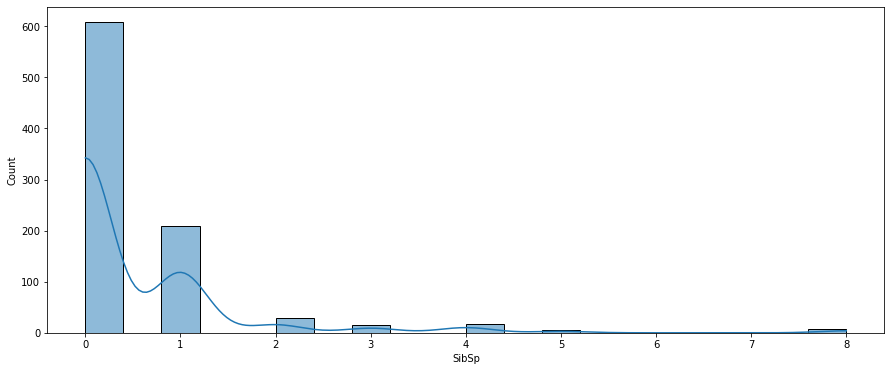

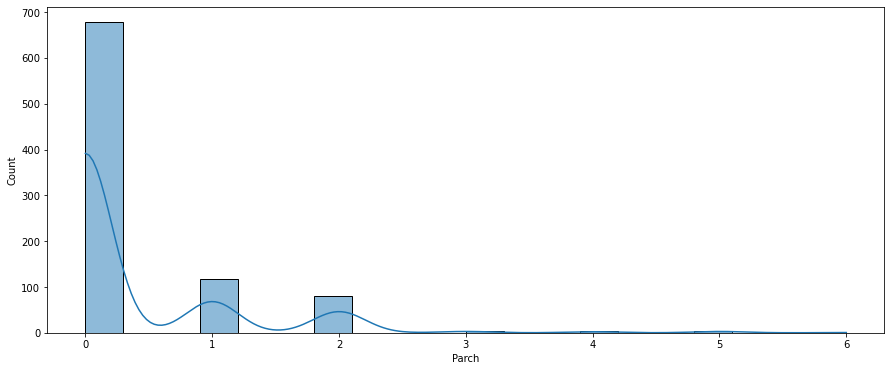

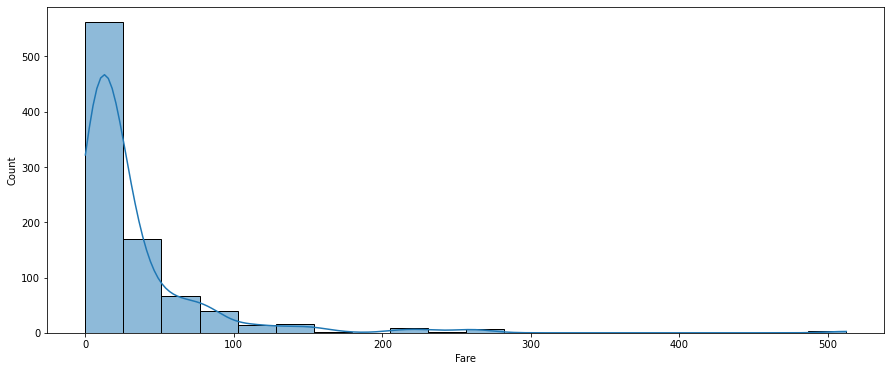

In [53]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde=True, bins =20, palette='hls')
    plt.xticks(rotation=0)
    plt.show()

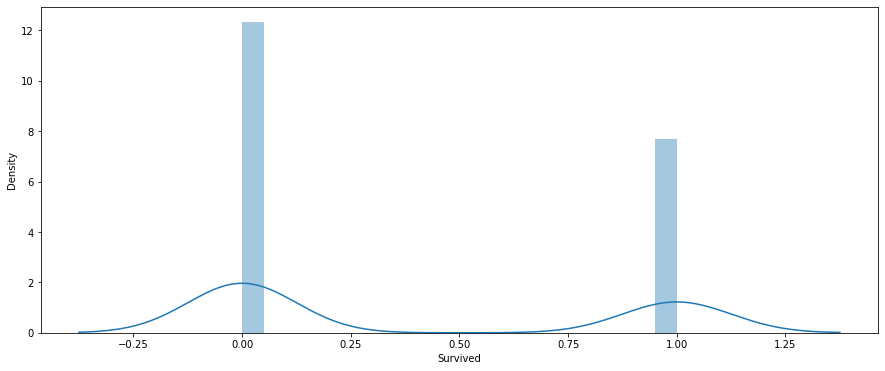

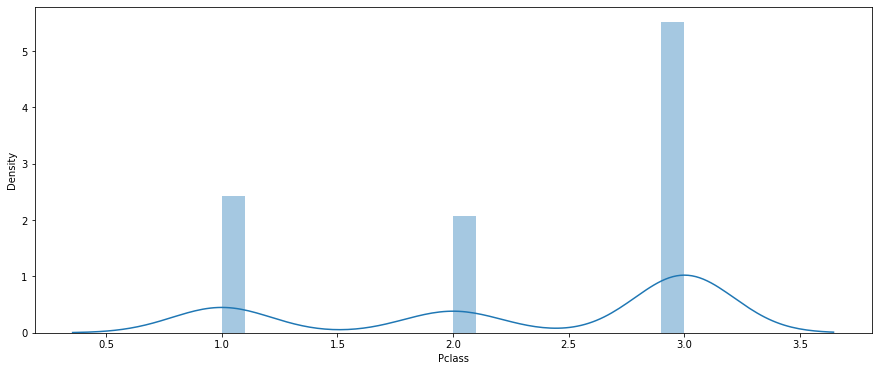

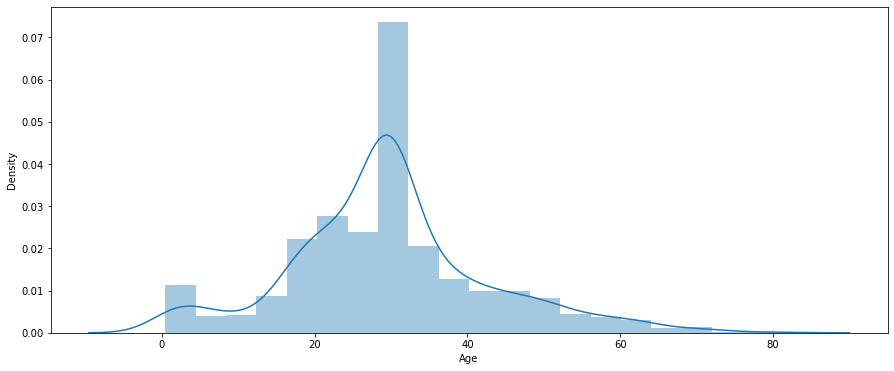

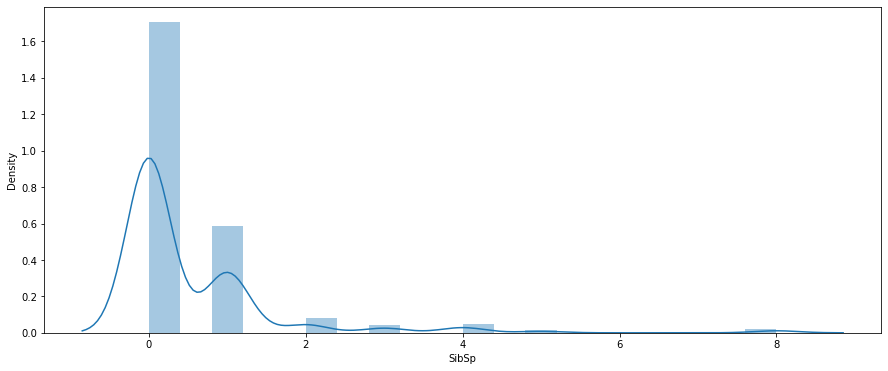

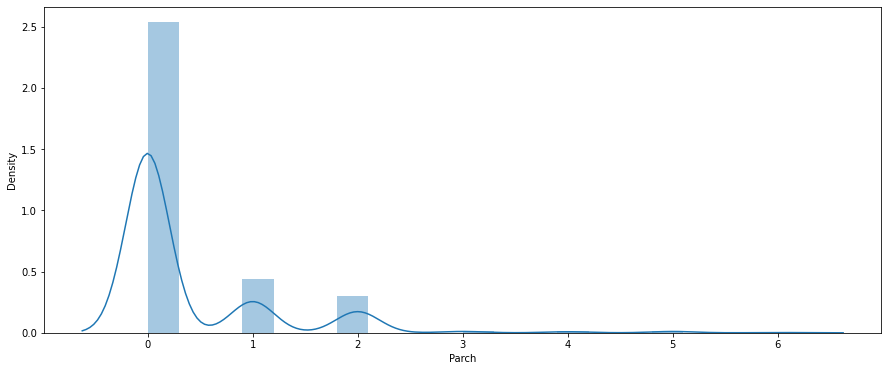

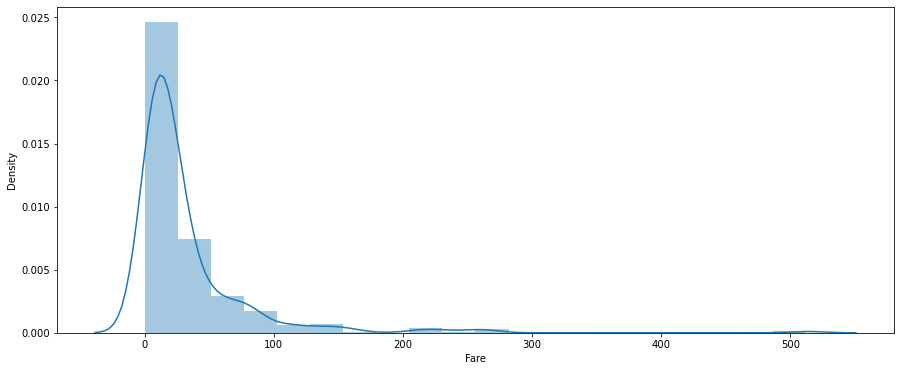

In [54]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde=True, bins =20)
    plt.xticks(rotation=0)
    plt.show()

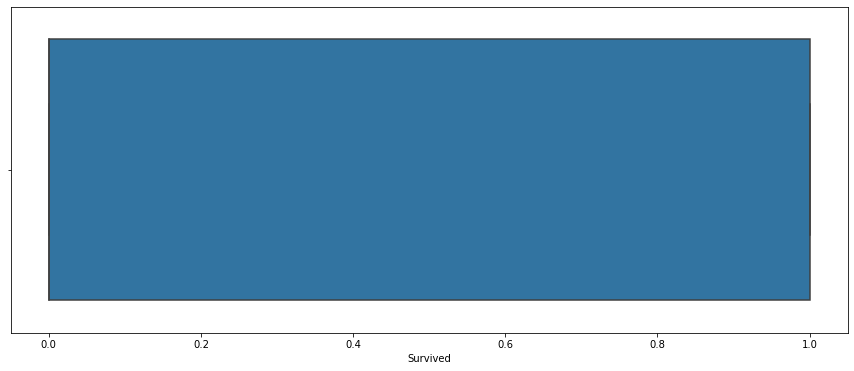

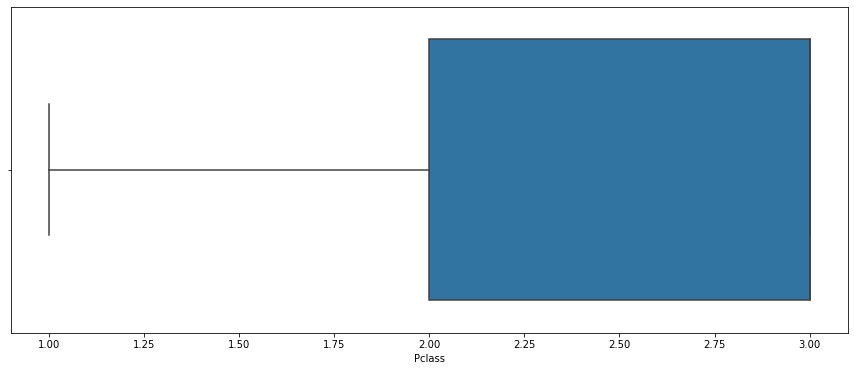

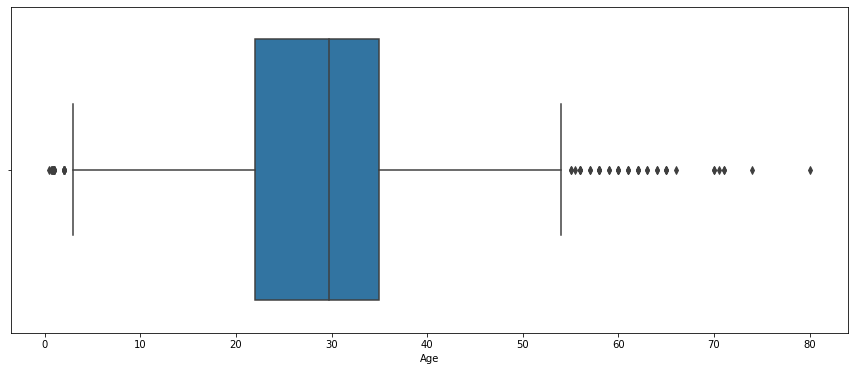

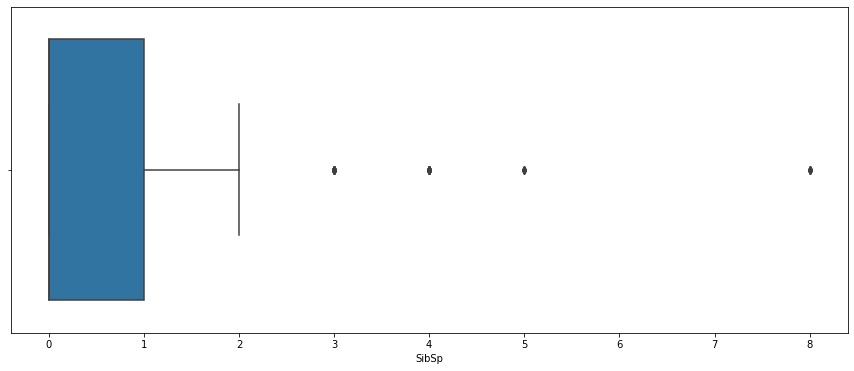

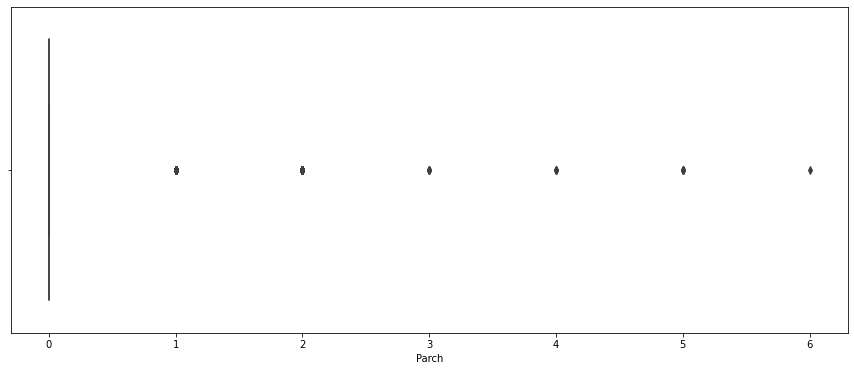

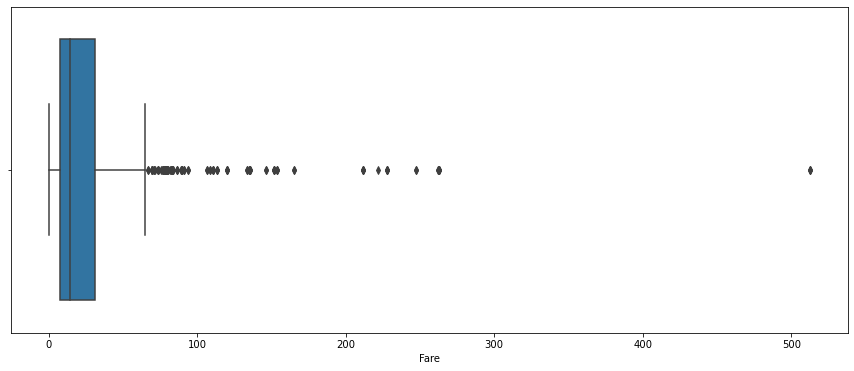

In [56]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i])
    plt.xticks(rotation=0)
    plt.show()

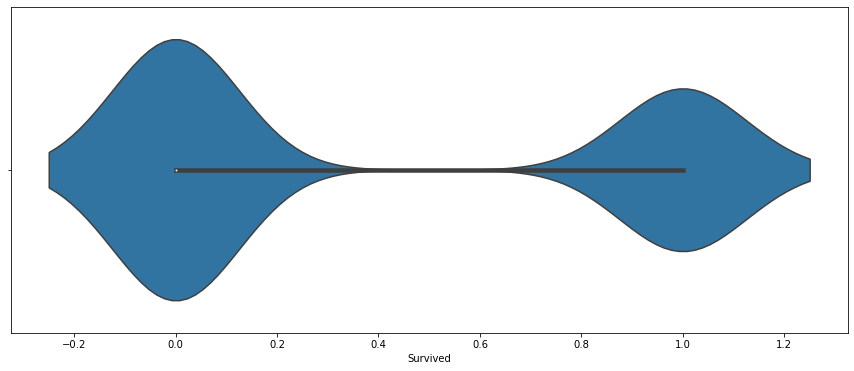

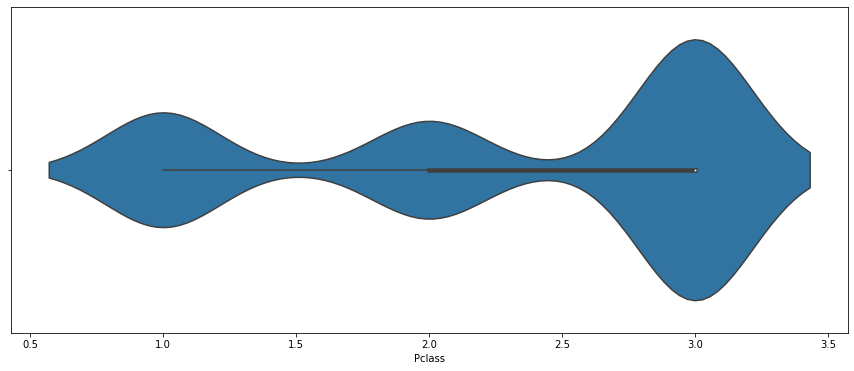

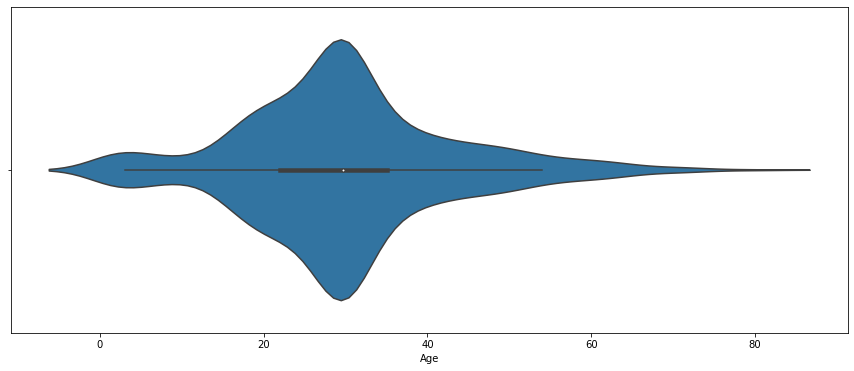

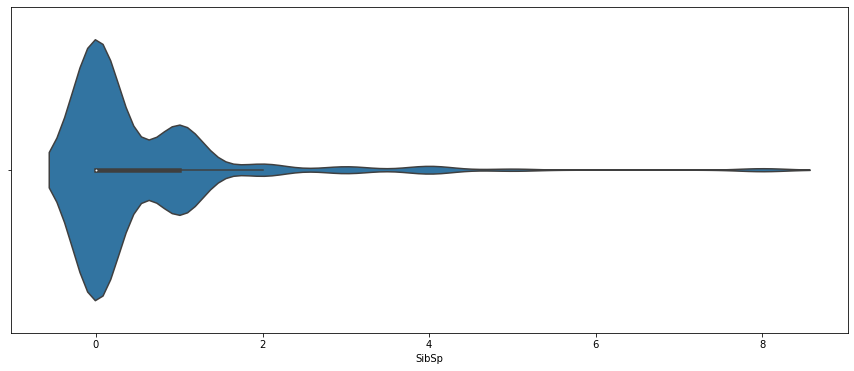

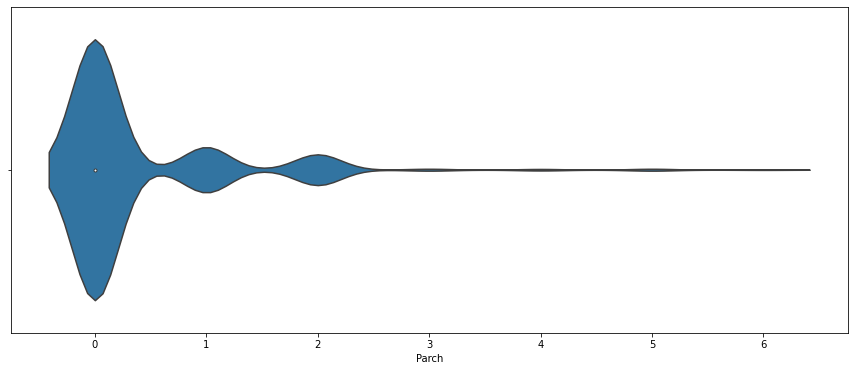

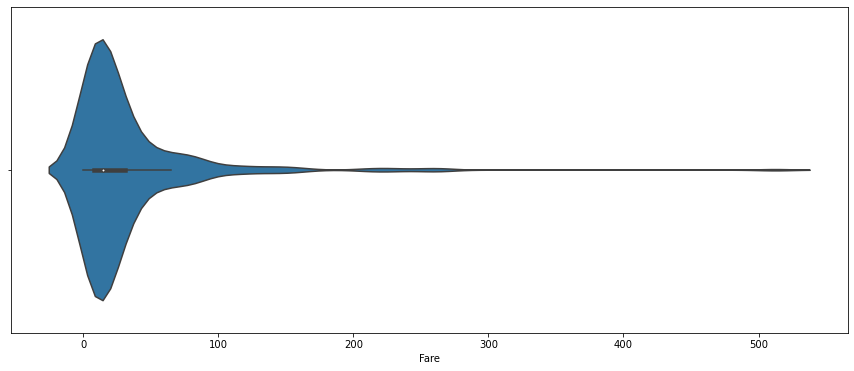

In [57]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(df[i])
    plt.xticks(rotation=0)
    plt.show()

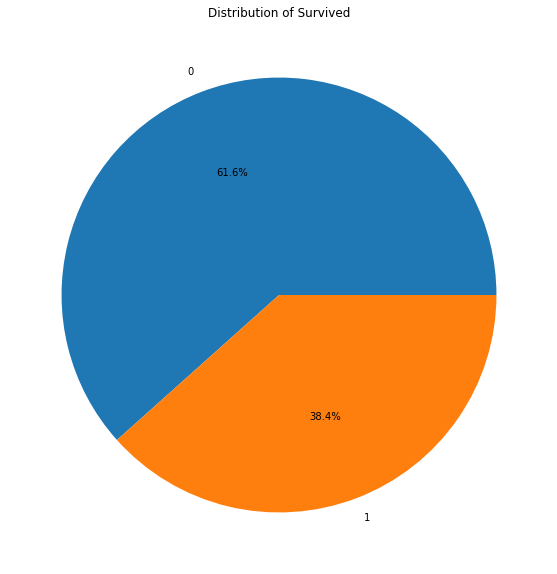

In [46]:
 plt.figure(figsize=(20,10))
df['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Survived')
plt.ylabel('')
plt.show()
print('\n')

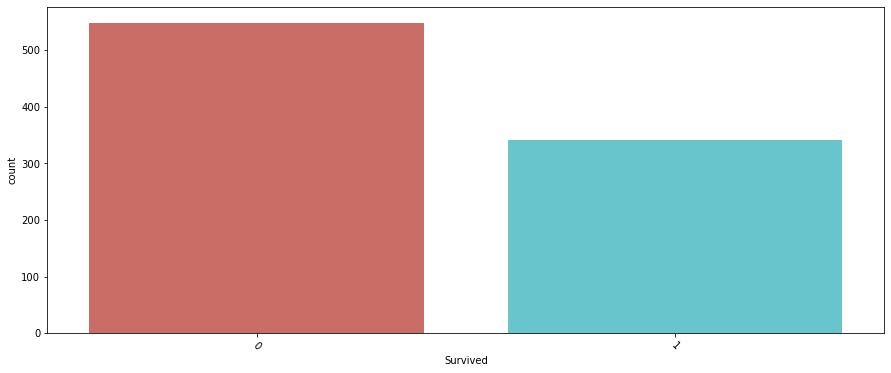

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x= df['Survived'],data = df , palette= 'hls')
plt.xticks(rotation = -45)
plt.show()
print("\n")

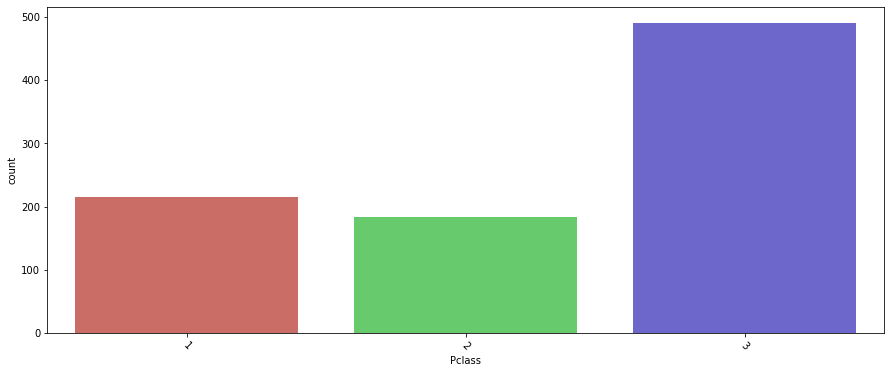

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x= df['Pclass'],data = df , palette= 'hls')
plt.xticks(rotation = -45)
plt.show()
print("\n")

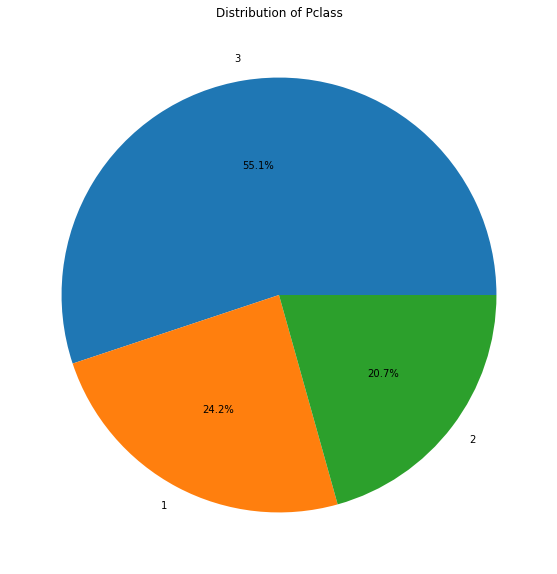

In [50]:
plt.figure(figsize=(20,10))
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Pclass')
plt.ylabel('')
plt.show()
print('\n')

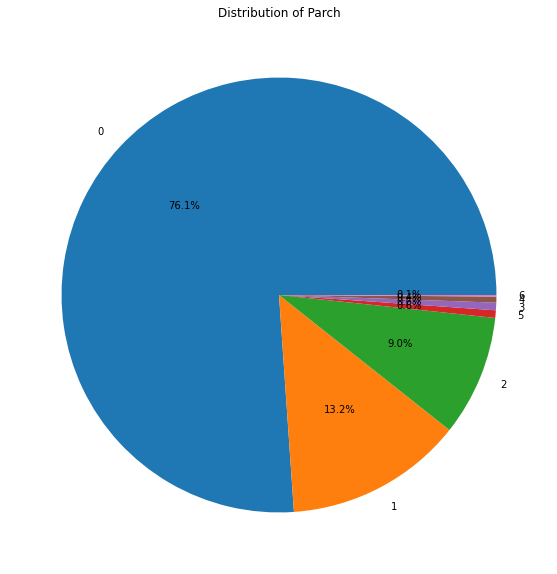

In [51]:

plt.figure(figsize=(20,10))
df['Parch'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Parch')
plt.ylabel('')
plt.show()
print('\n')

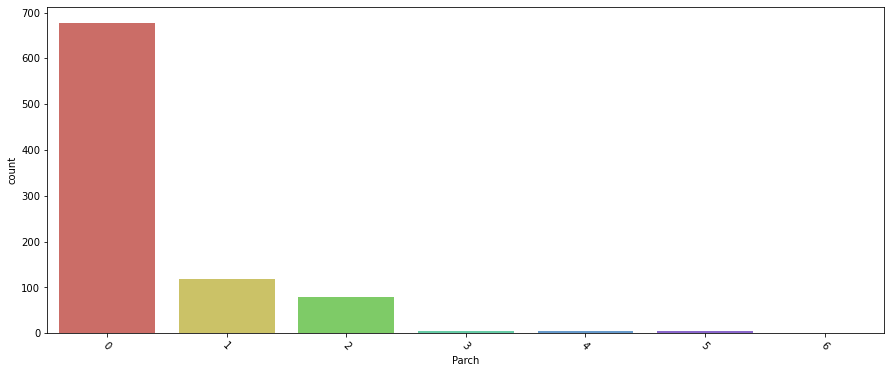

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(x= df['Parch'],data = df , palette= 'hls')
plt.xticks(rotation = -45)
plt.show()
print("\n")

    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x=df[j],y=df['Survived'],data=df,ci=None , palette='hls')          
        plt.show()

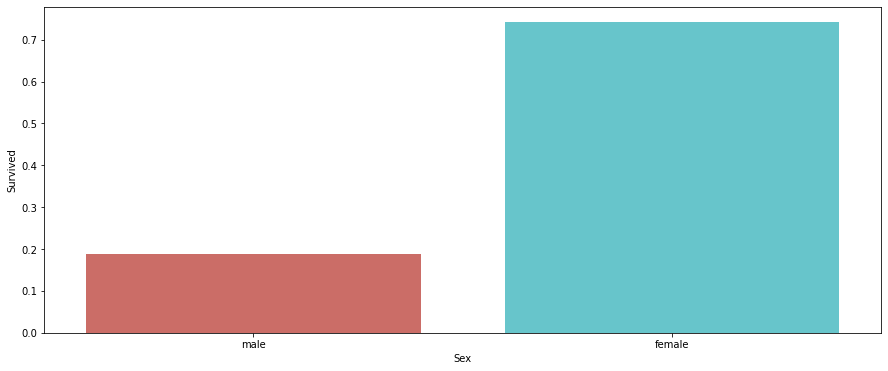

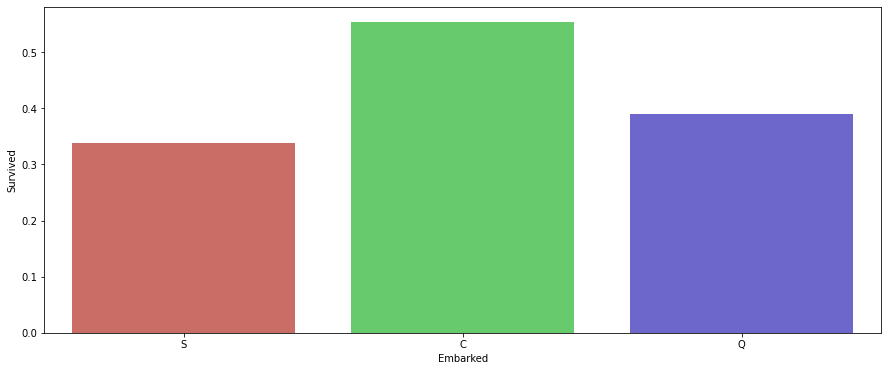

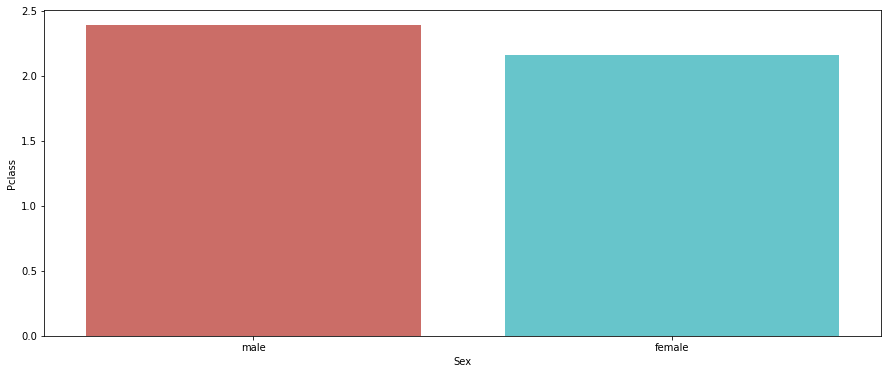

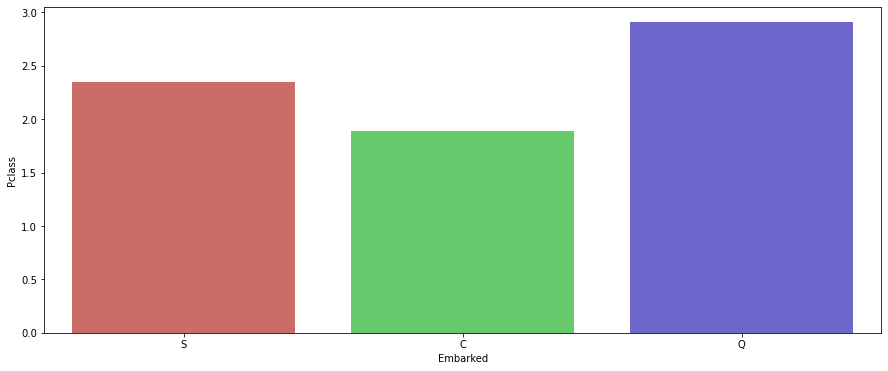

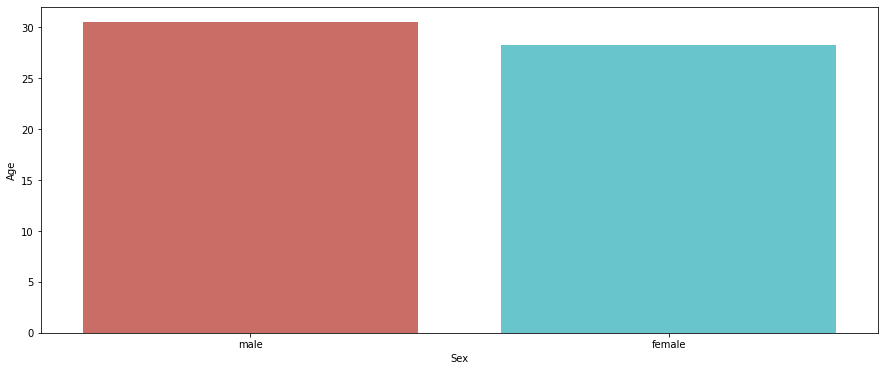

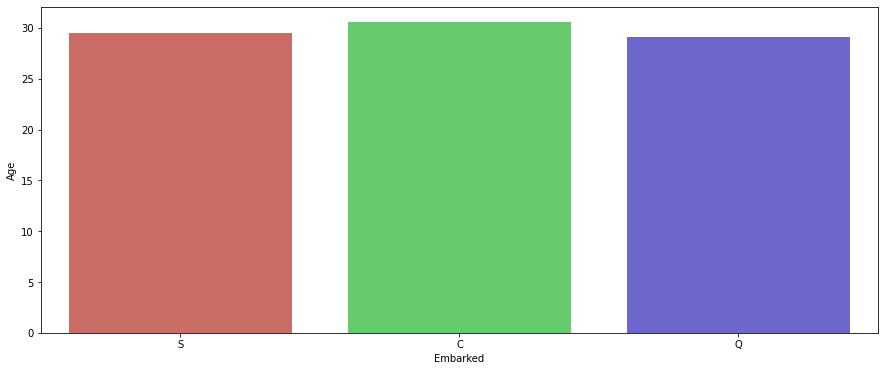

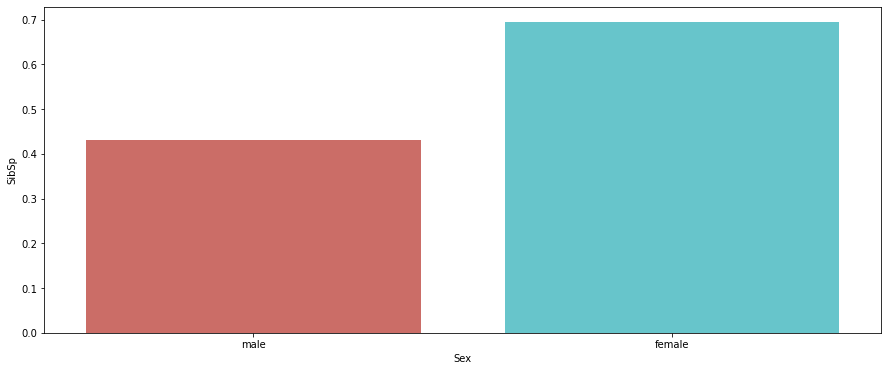

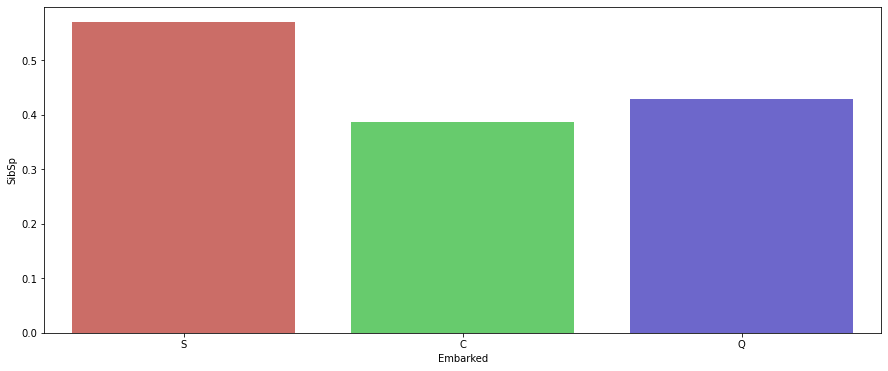

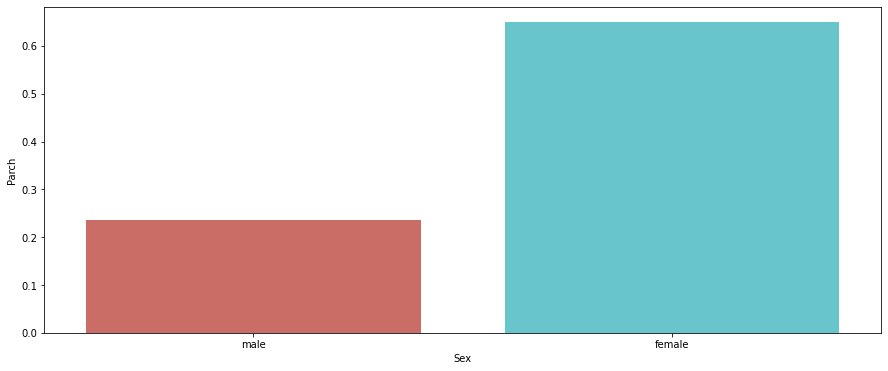

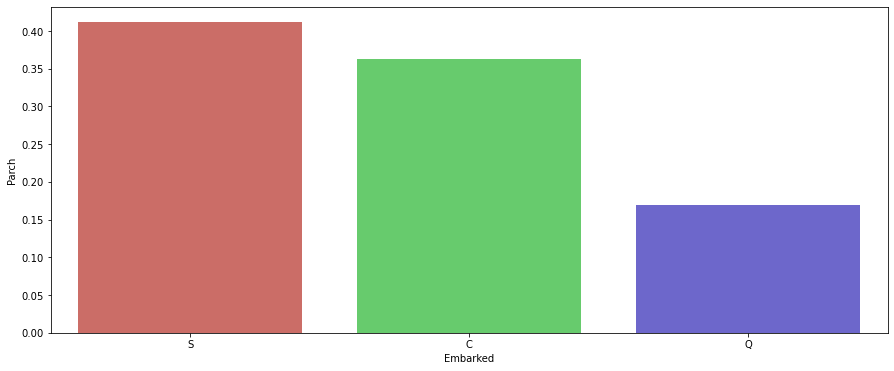

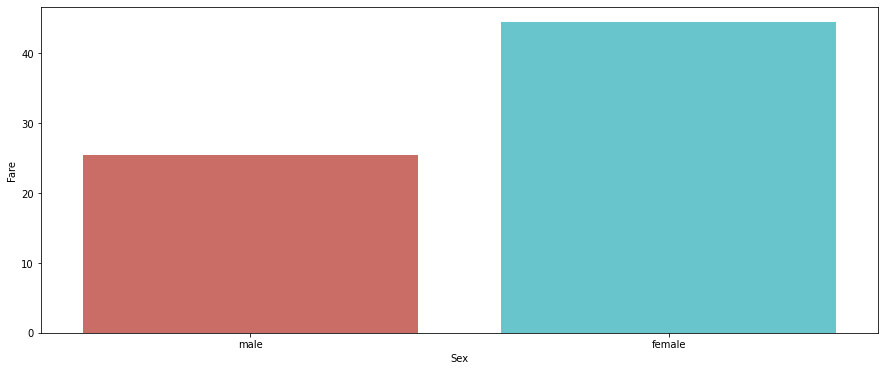

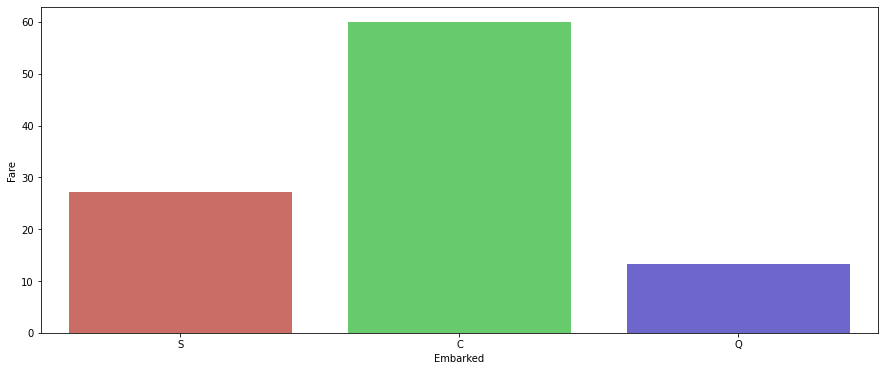

In [62]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x=df[j],y=df[i],data=df,ci=None , palette='hls')          
        plt.show()

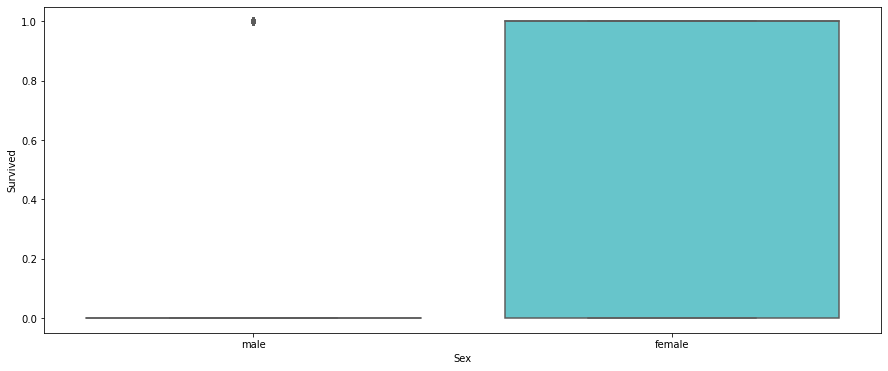

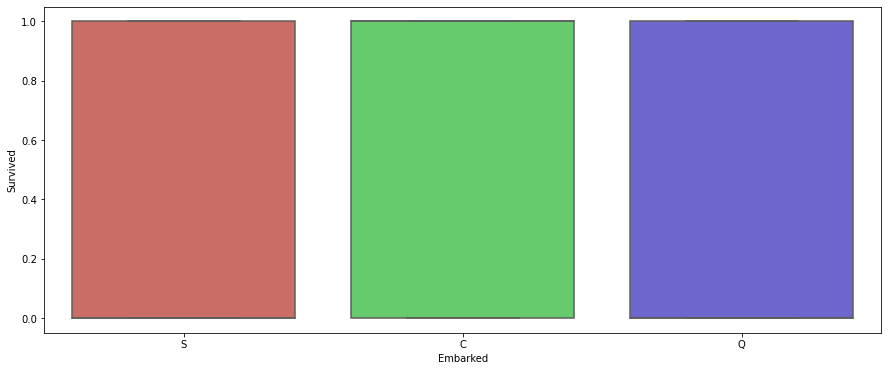

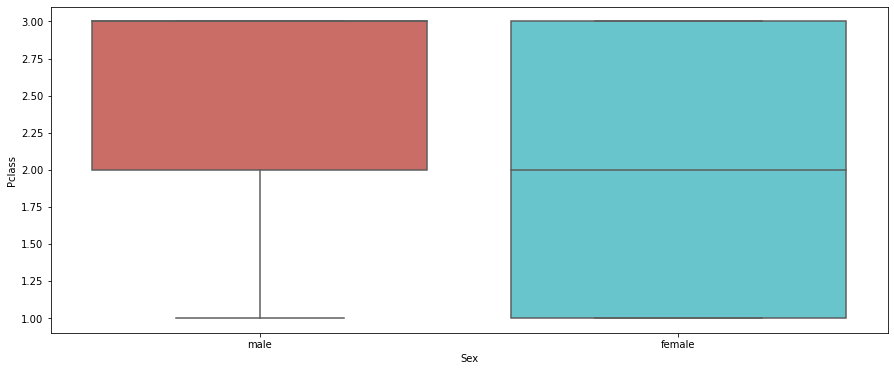

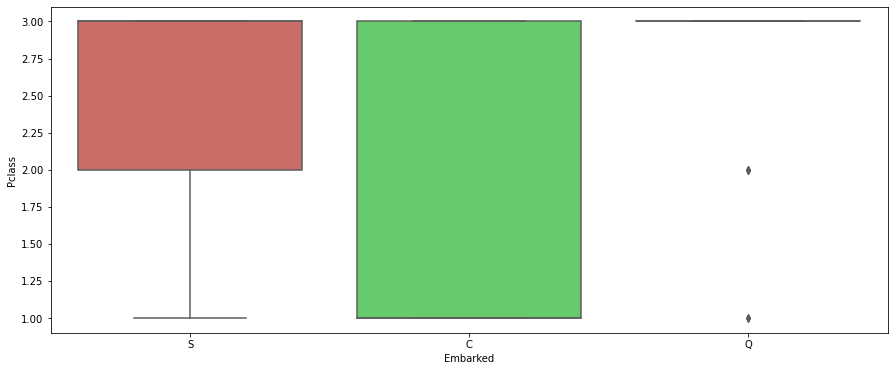

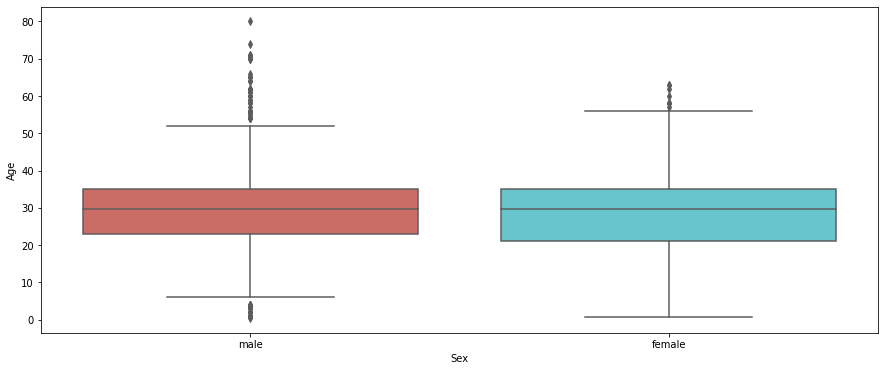

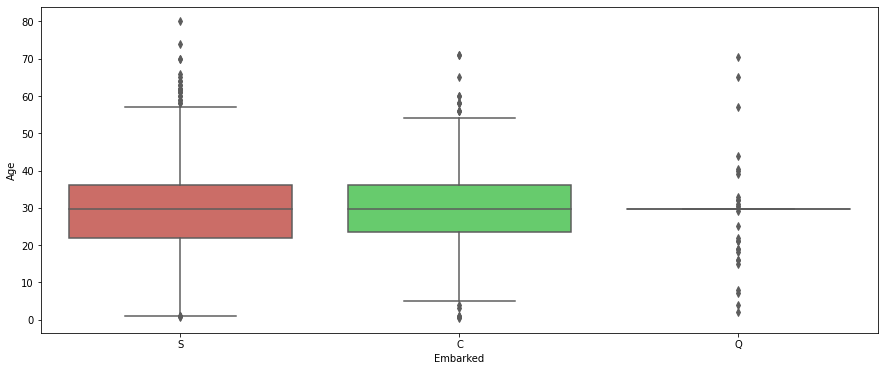

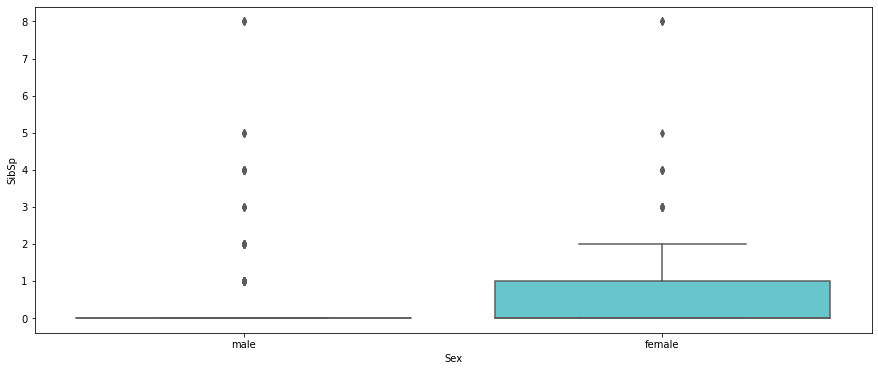

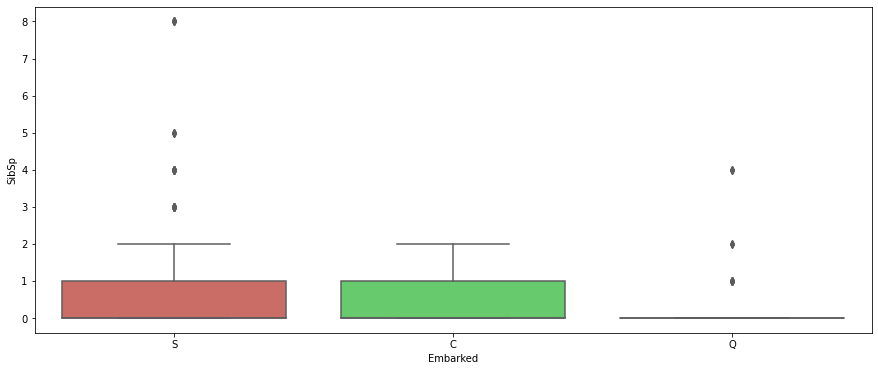

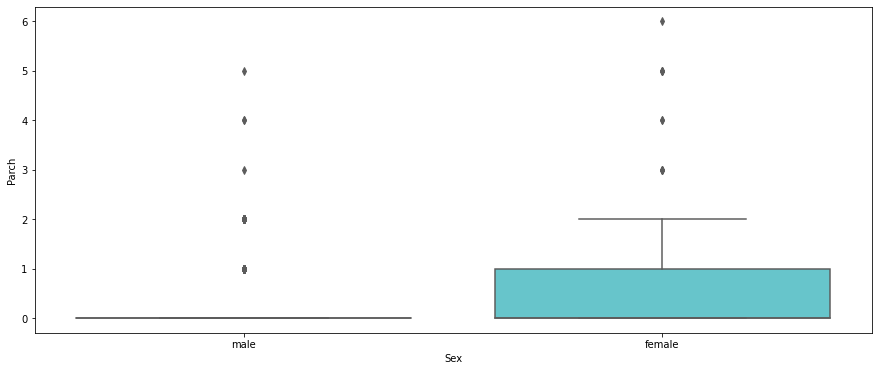

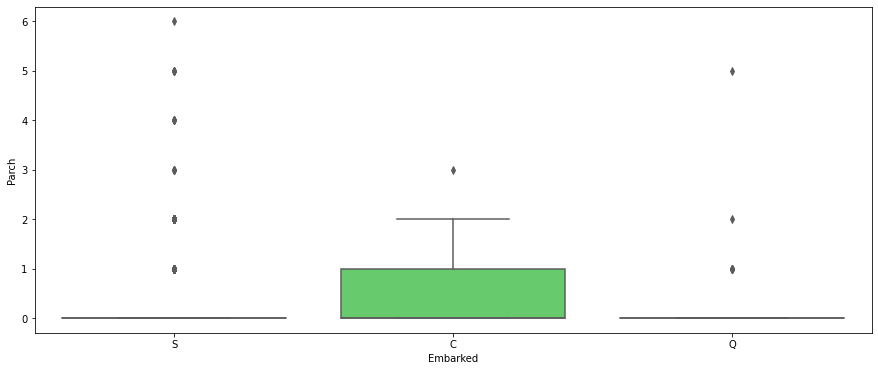

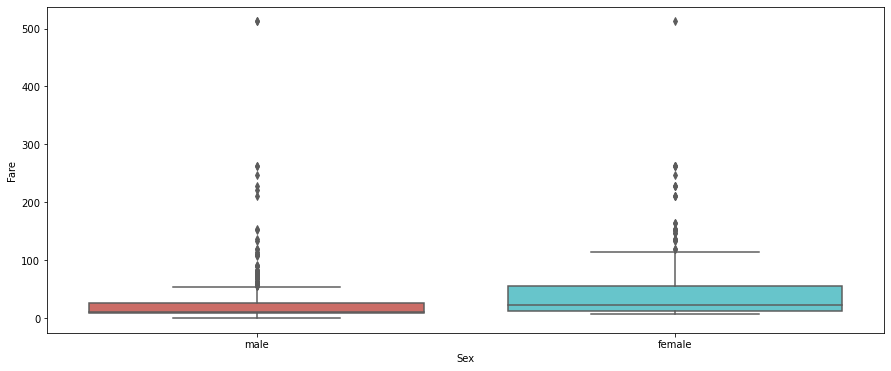

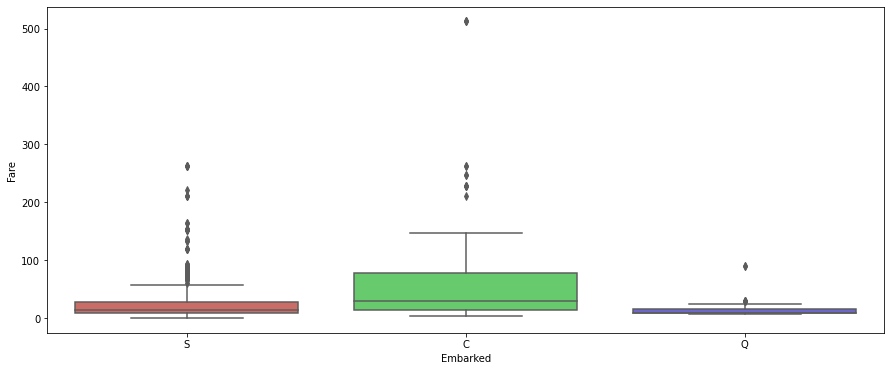

In [64]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x=df[j],y=df[i],data=df,palette='hls')          
        plt.show()

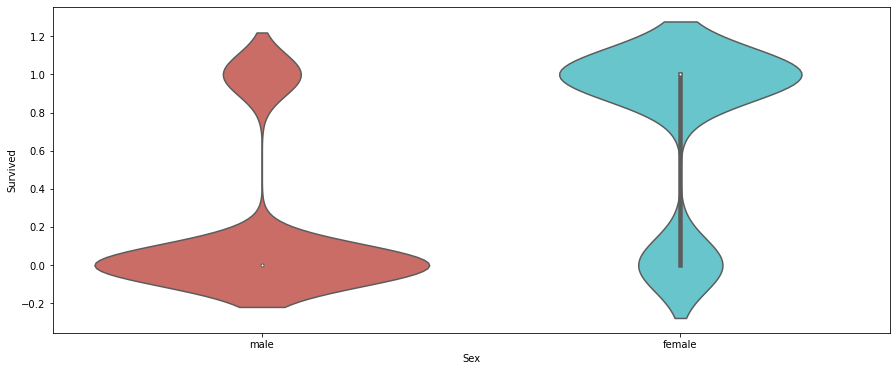

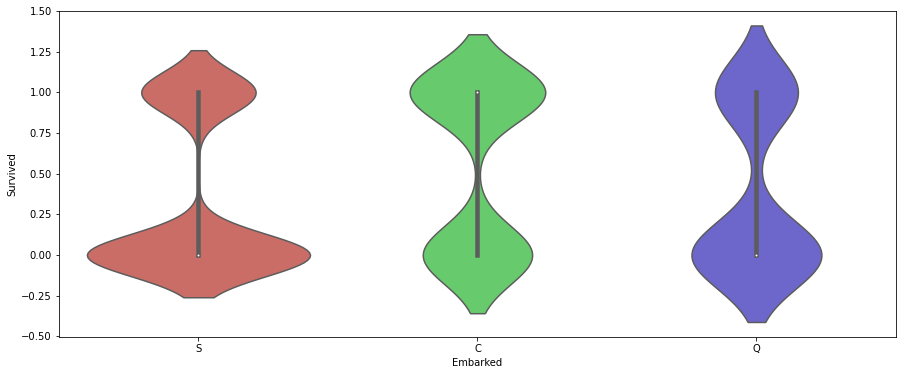

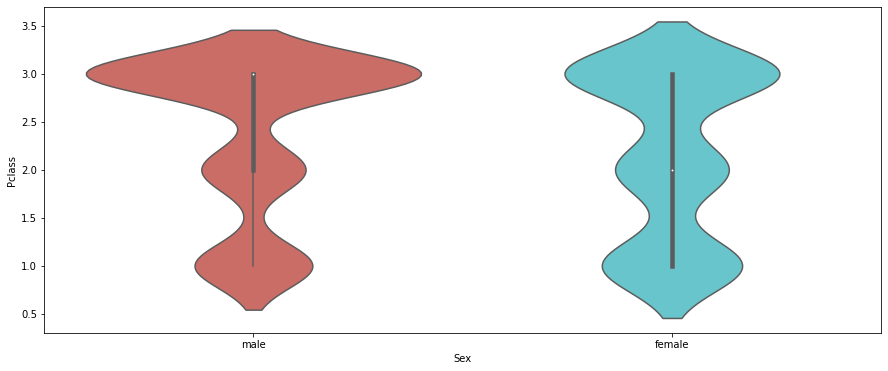

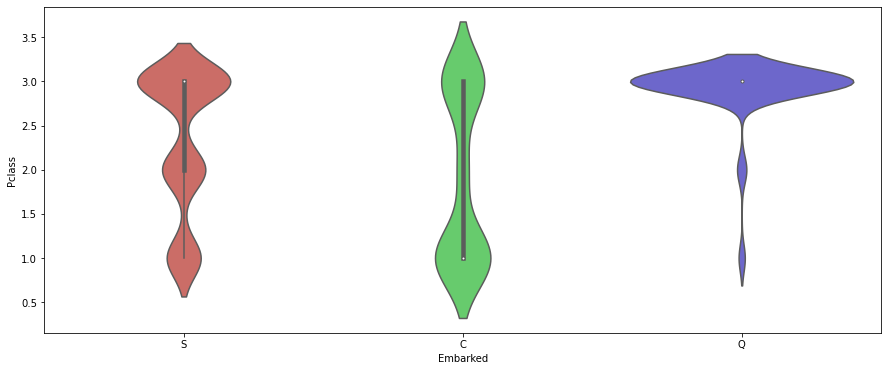

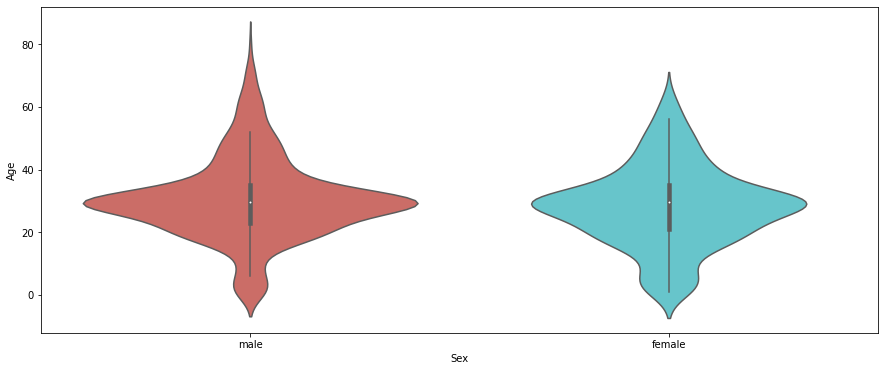

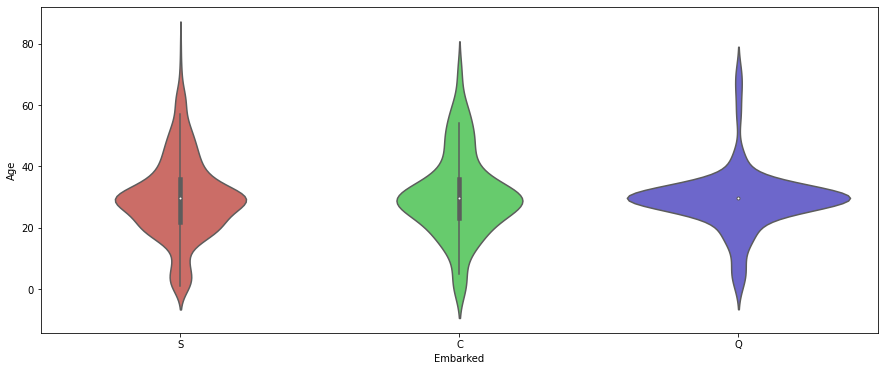

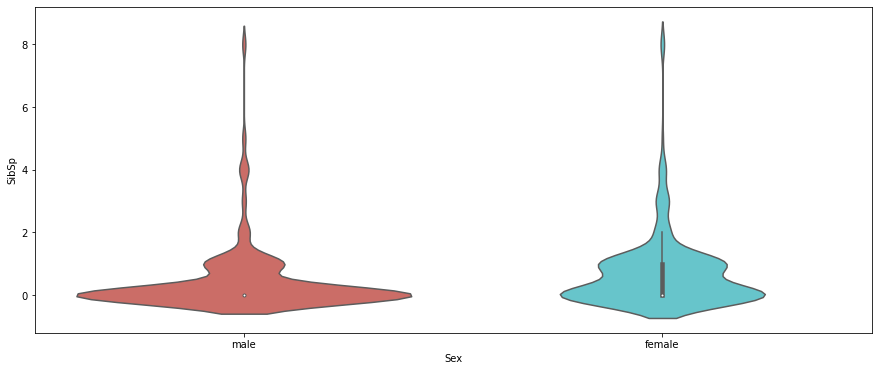

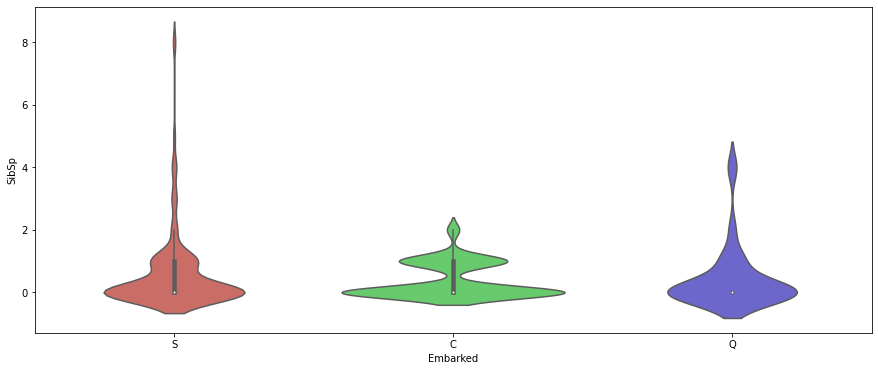

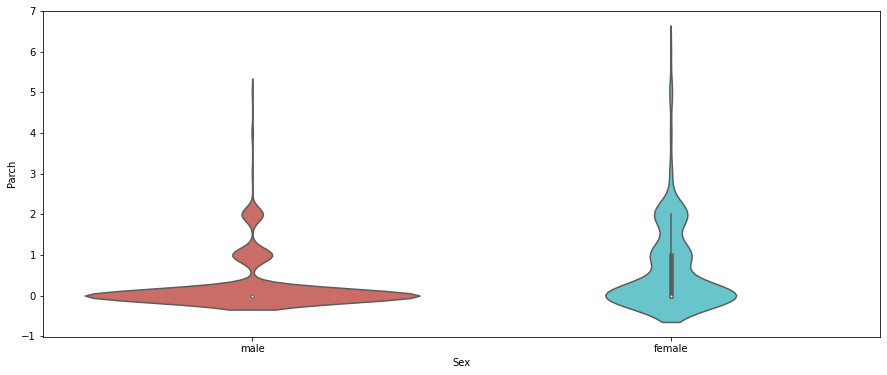

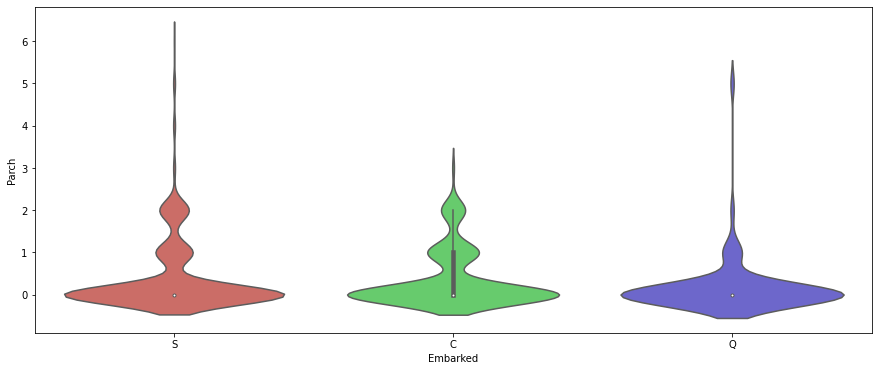

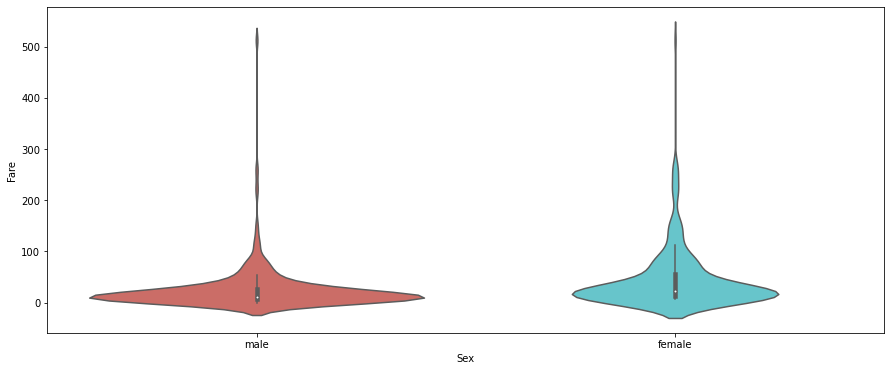

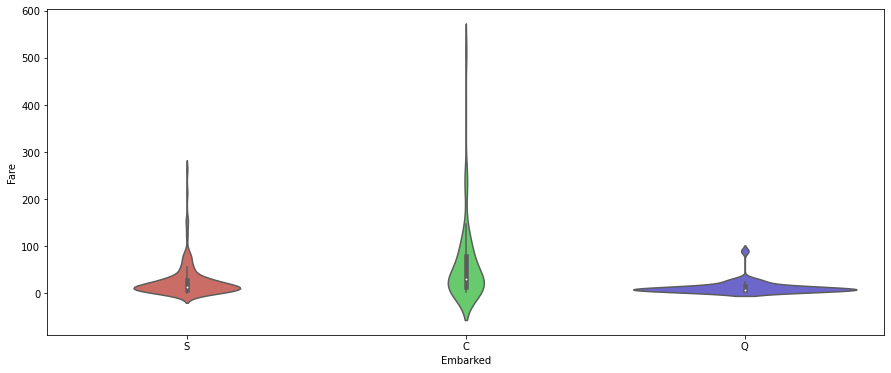

In [65]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.violinplot(x=df[j],y=df[i],data=df,palette='hls')          
        plt.show()

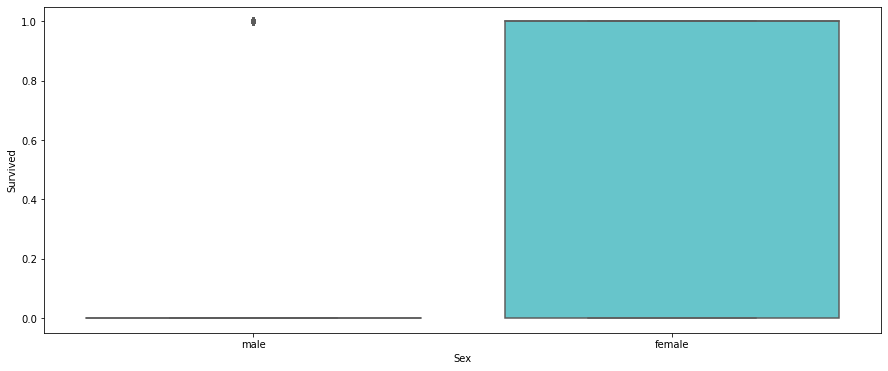

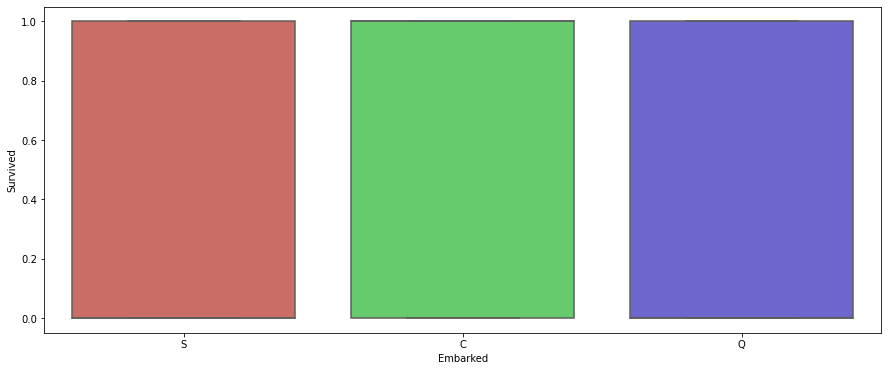

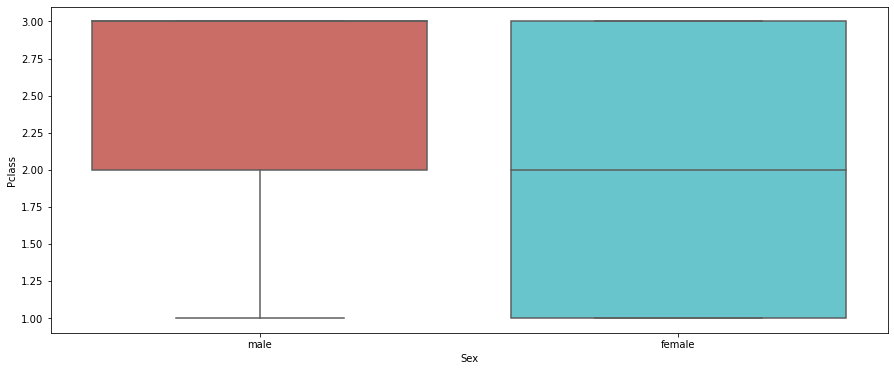

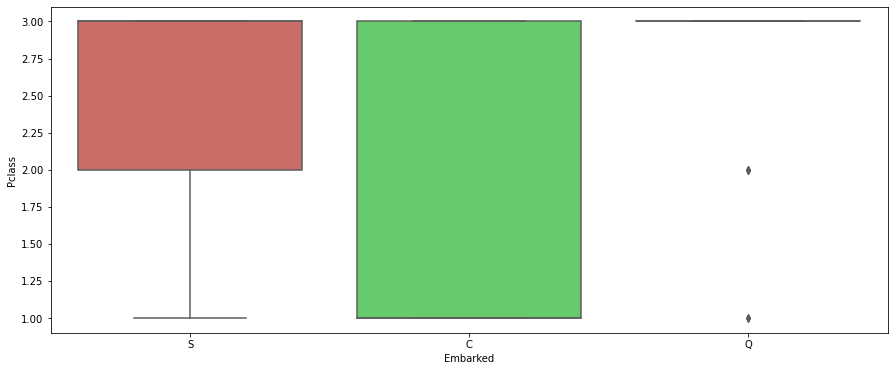

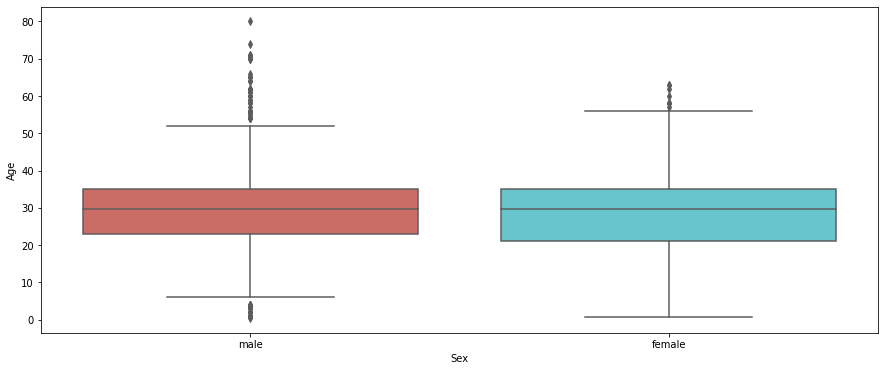

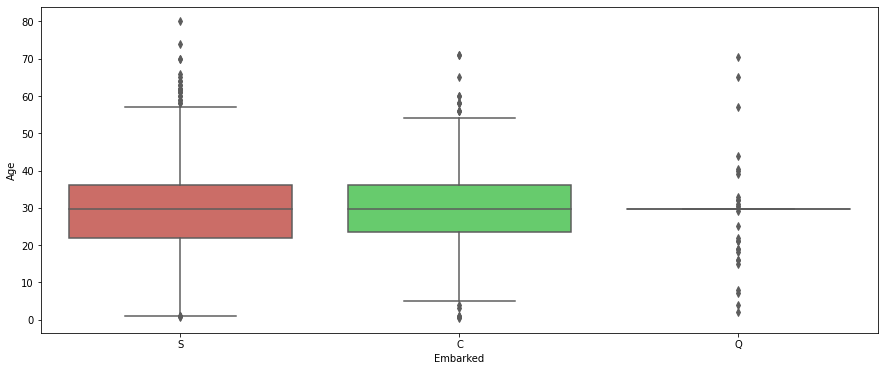

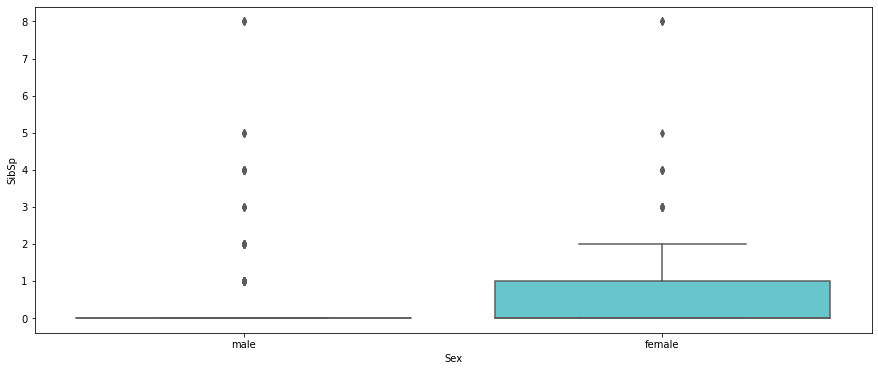

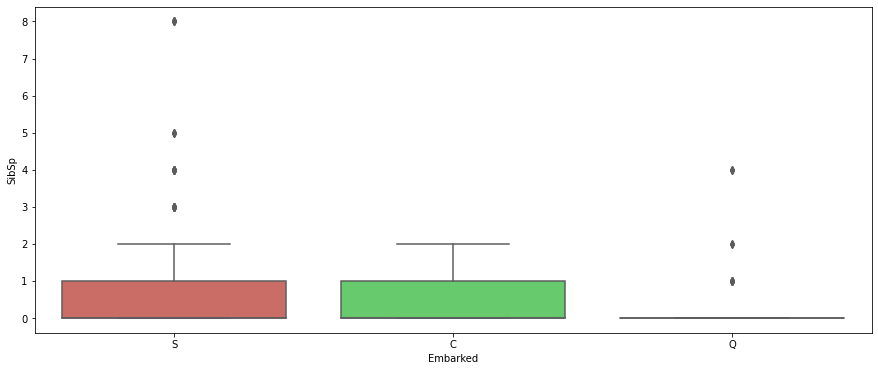

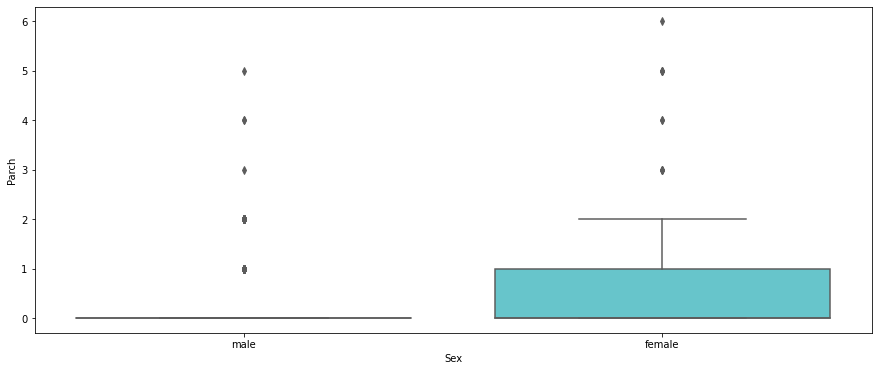

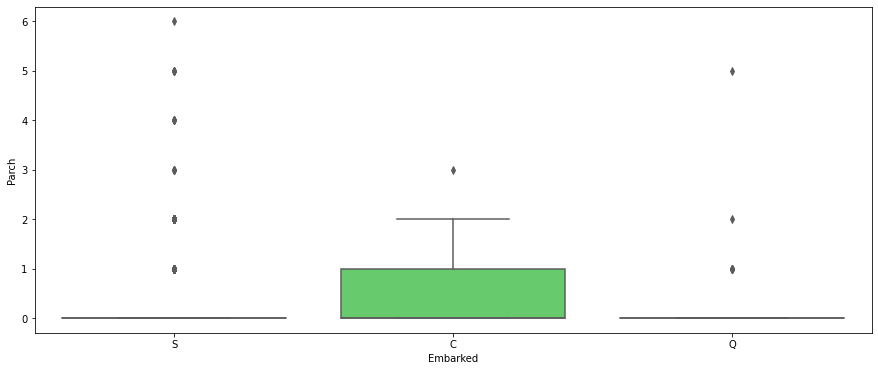

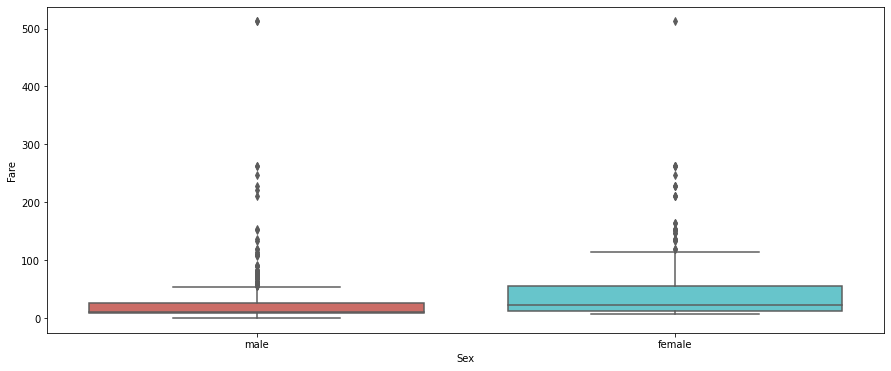

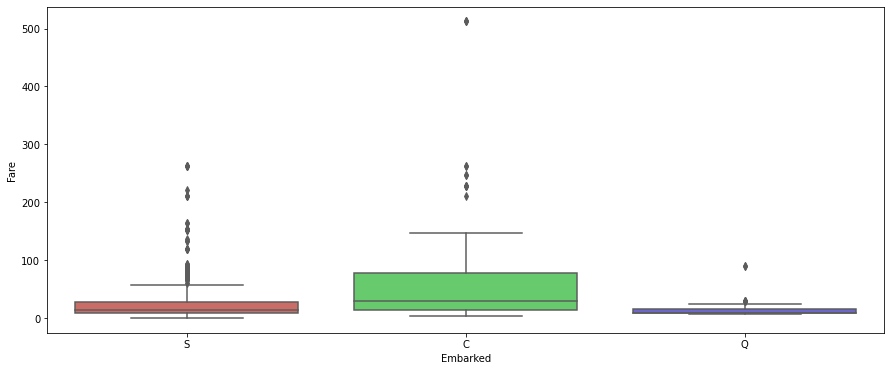

In [66]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x=df[j],y=df[i],data=df,palette='hls')          
        plt.show()

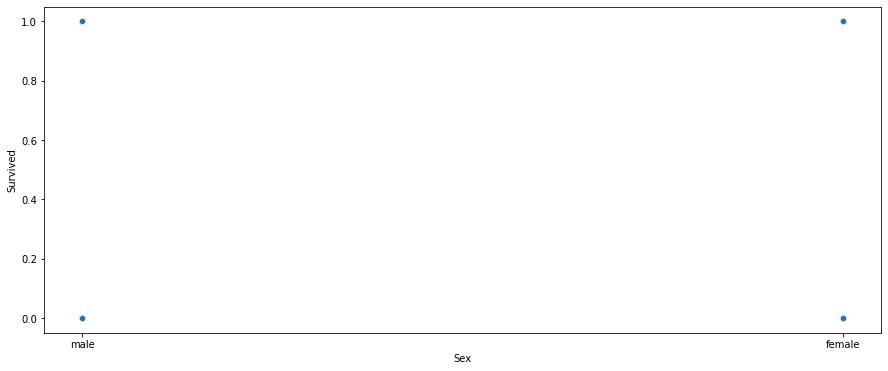

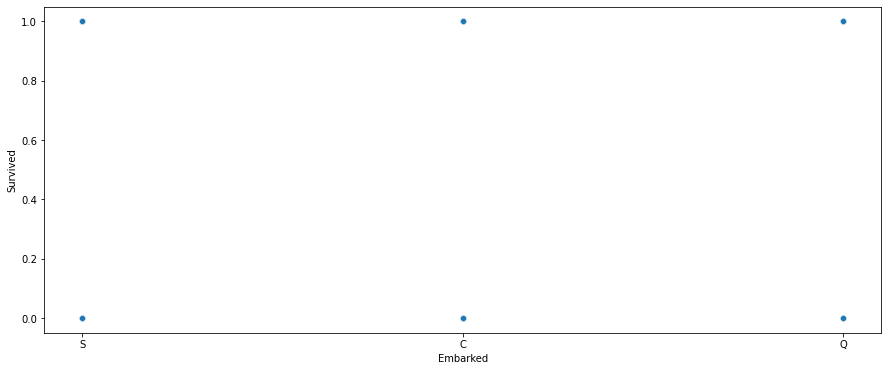

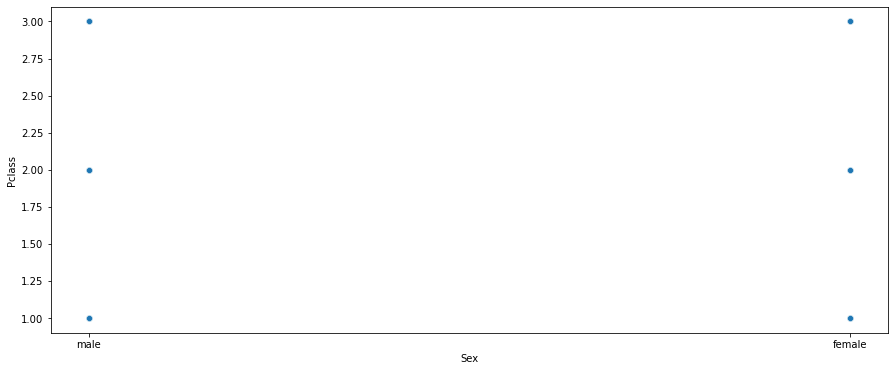

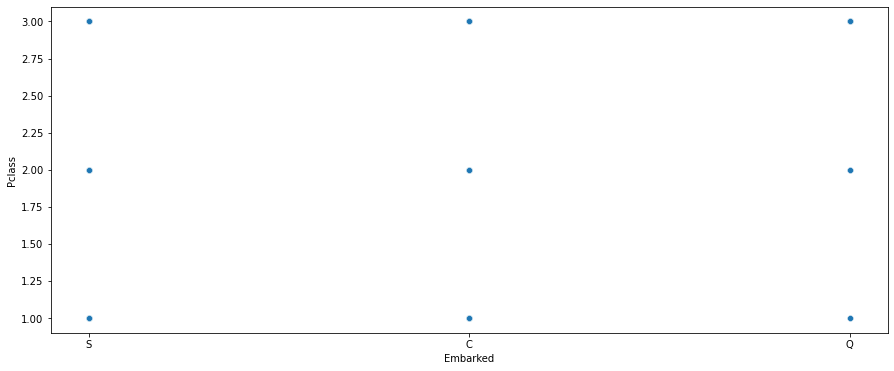

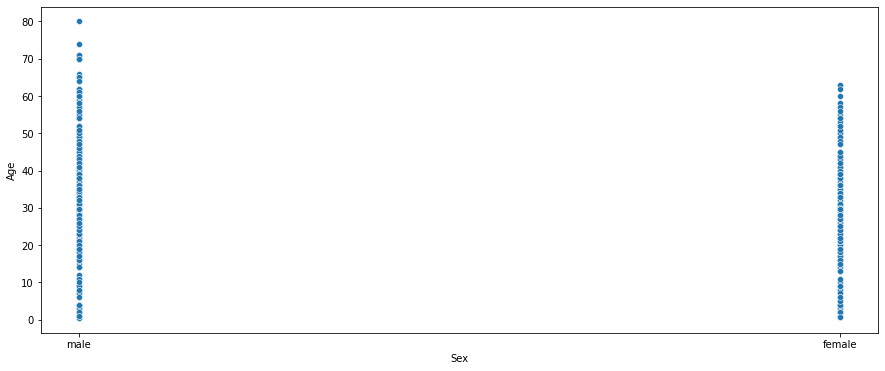

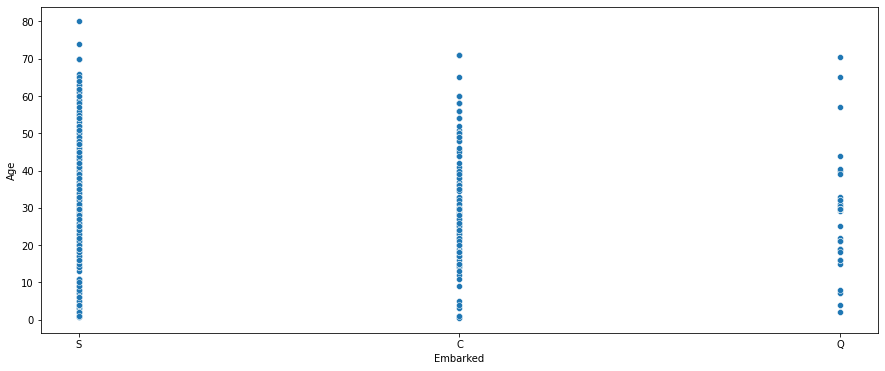

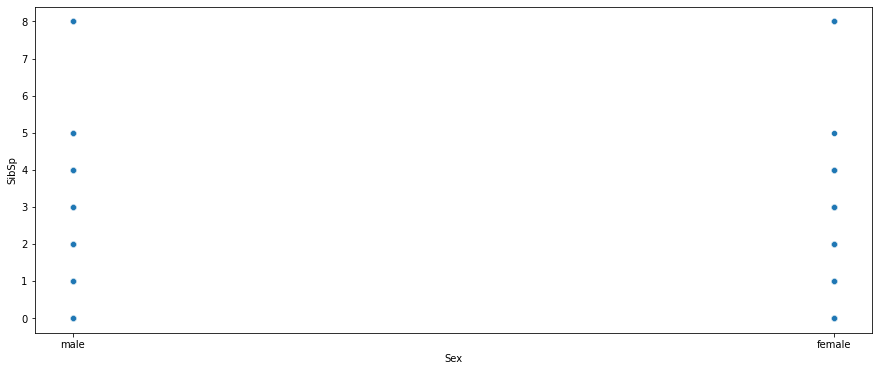

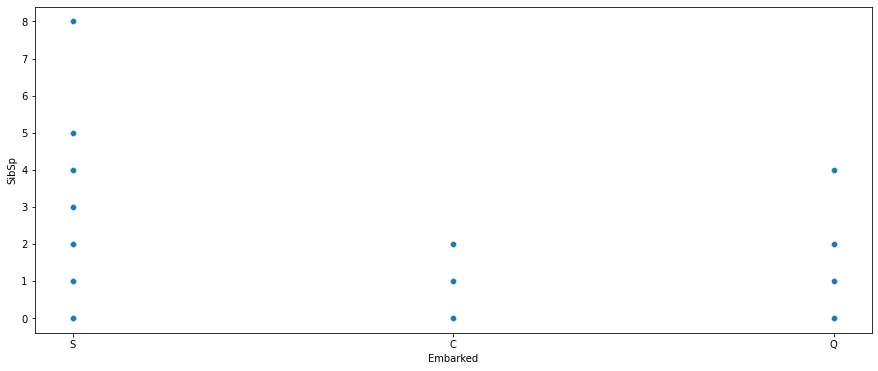

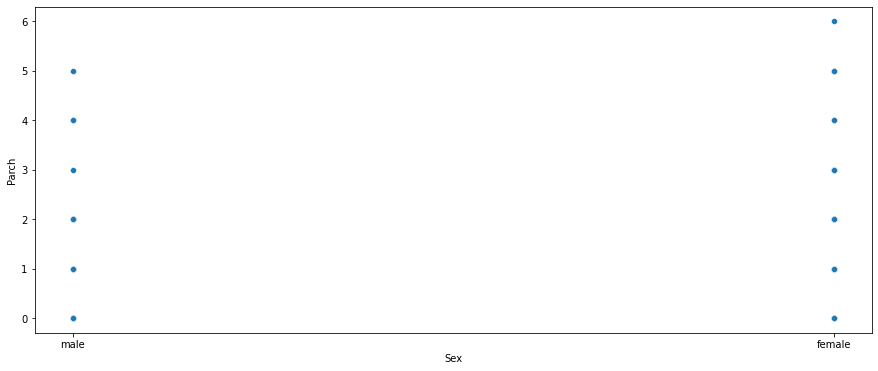

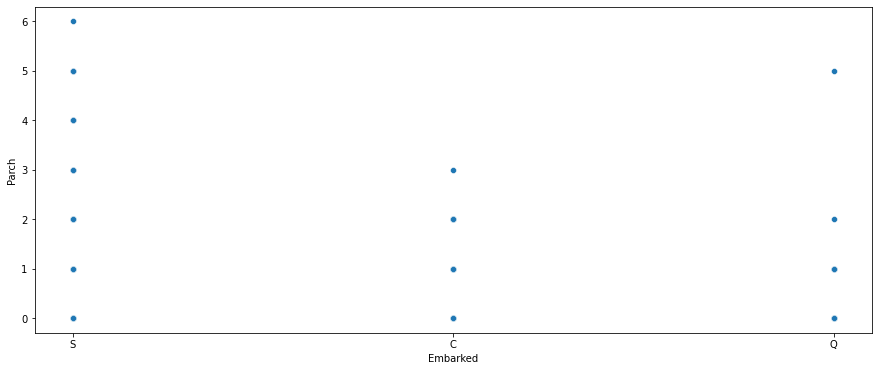

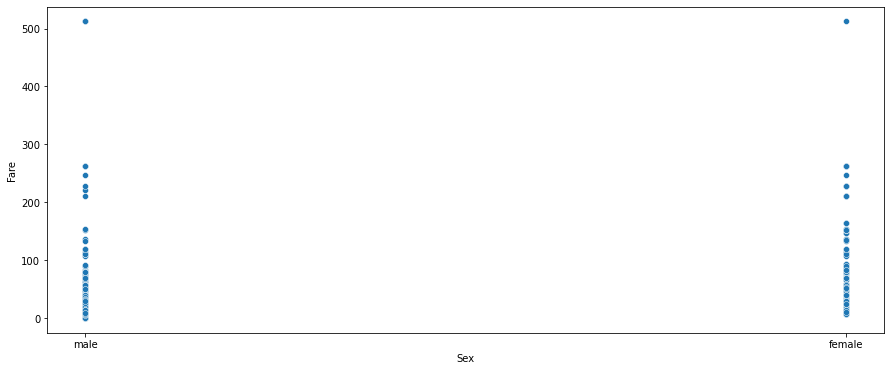

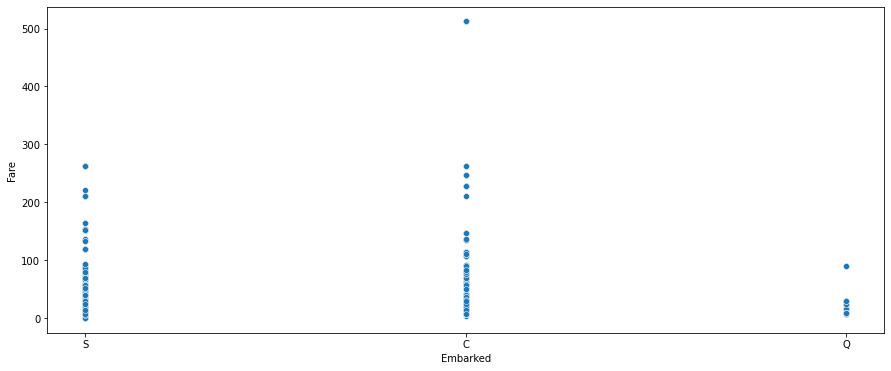

In [67]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.scatterplot(x=df[j],y=df[i],data=df,palette='hls')          
        plt.show()

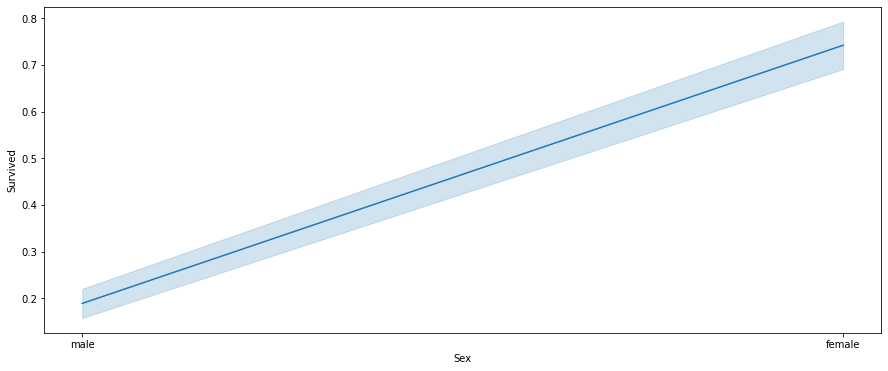

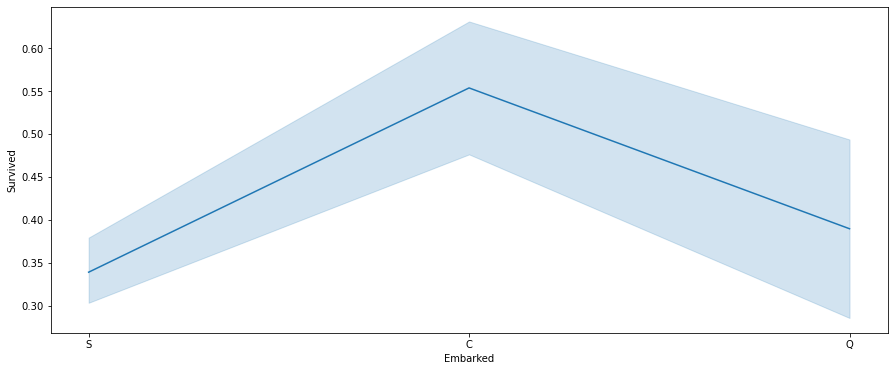

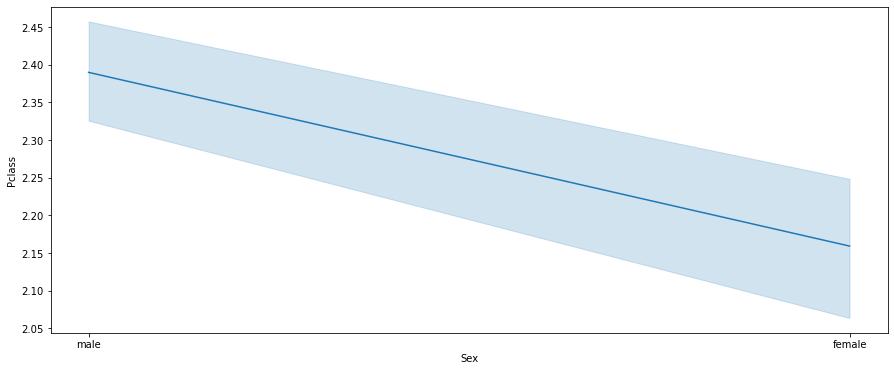

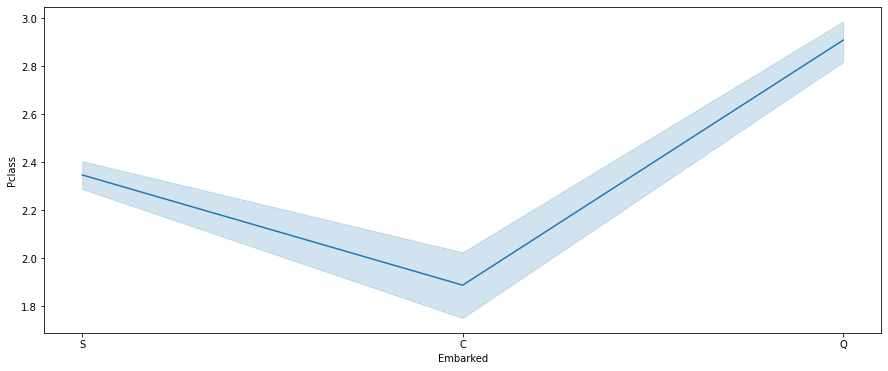

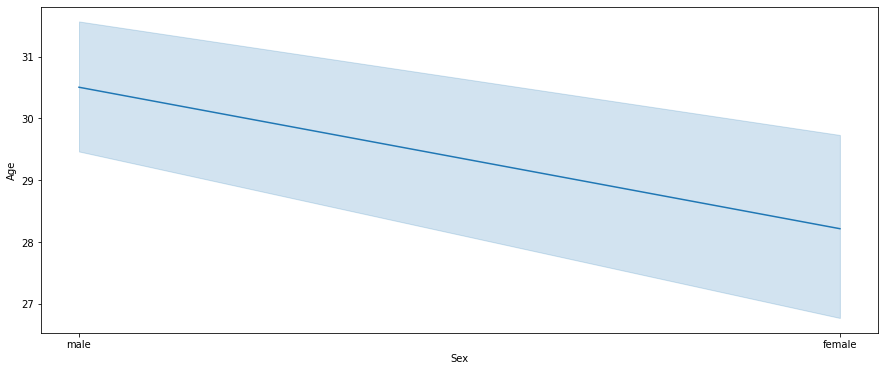

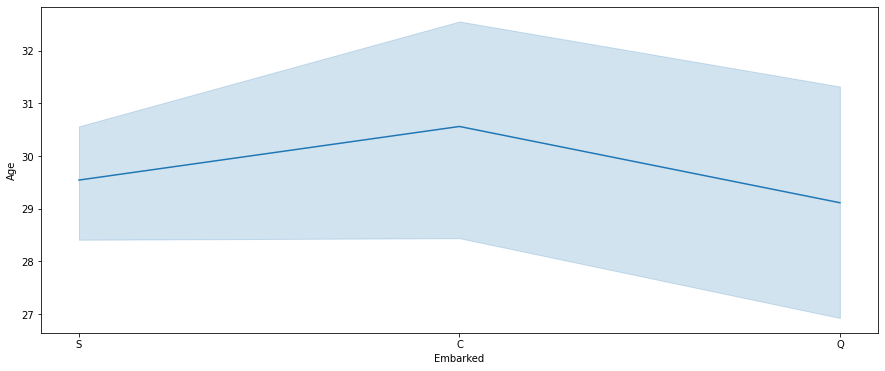

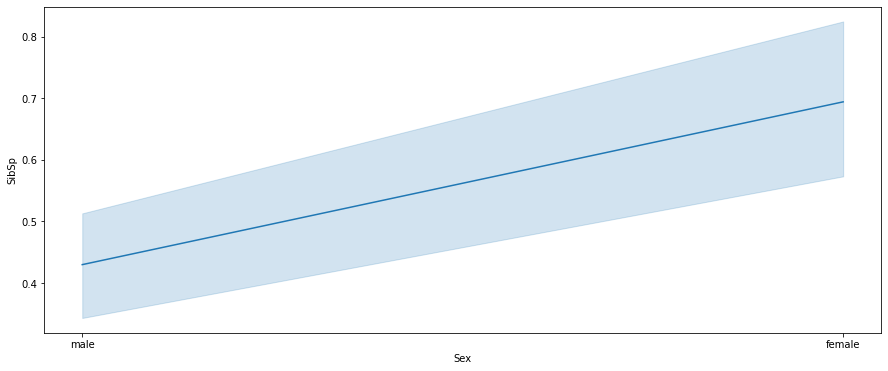

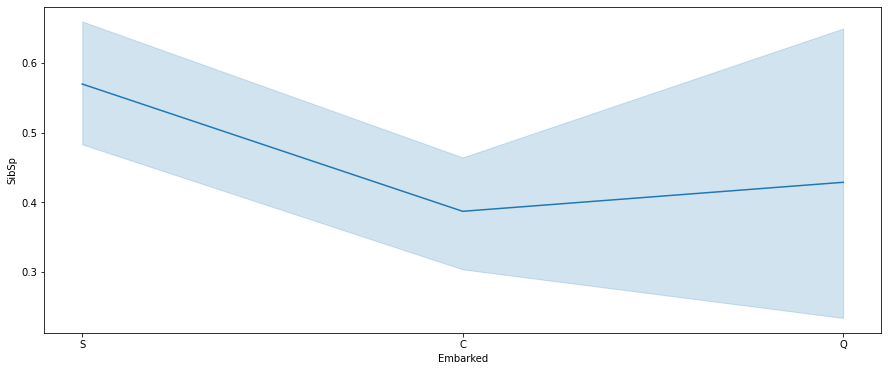

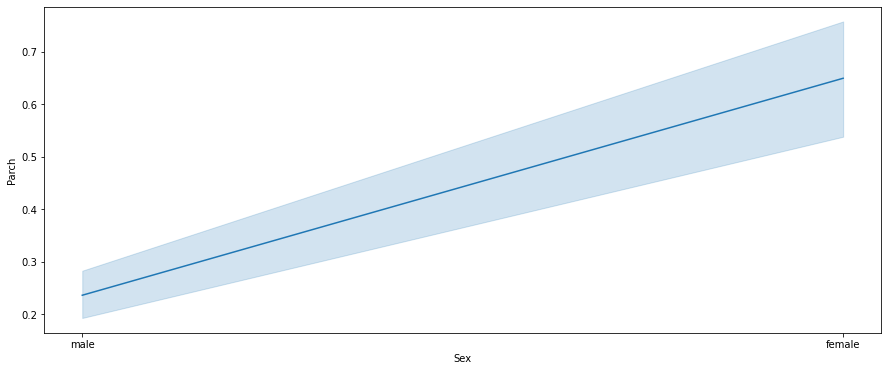

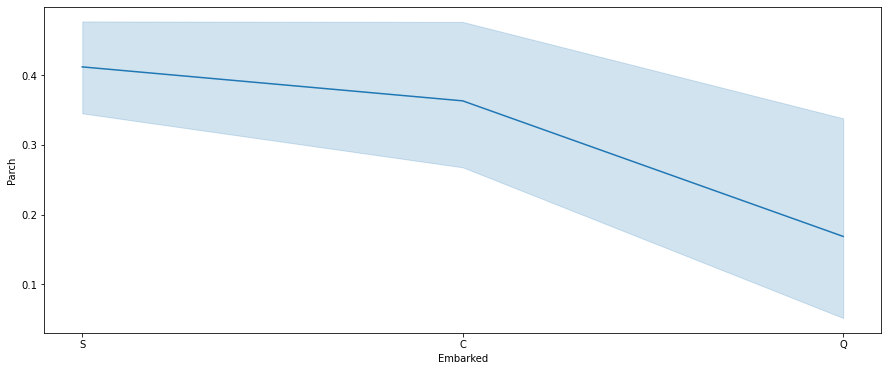

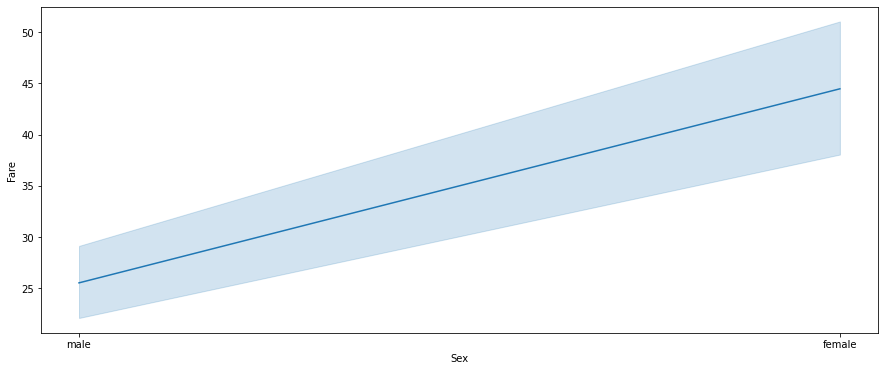

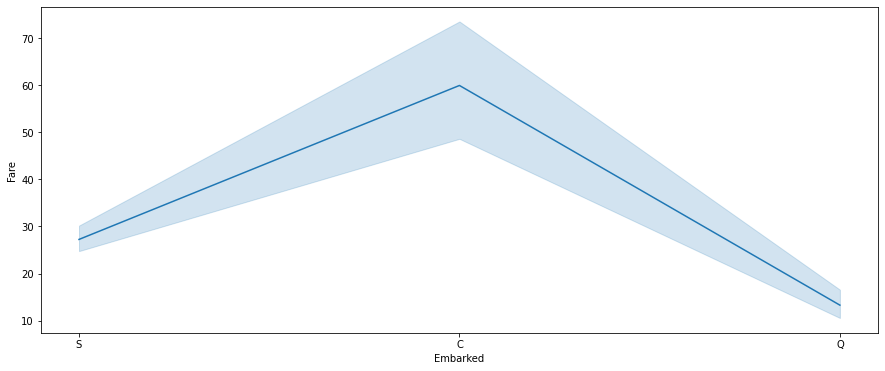

In [68]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.lineplot(x=df[j],y=df[i],data=df,palette='hls')          
        plt.show()

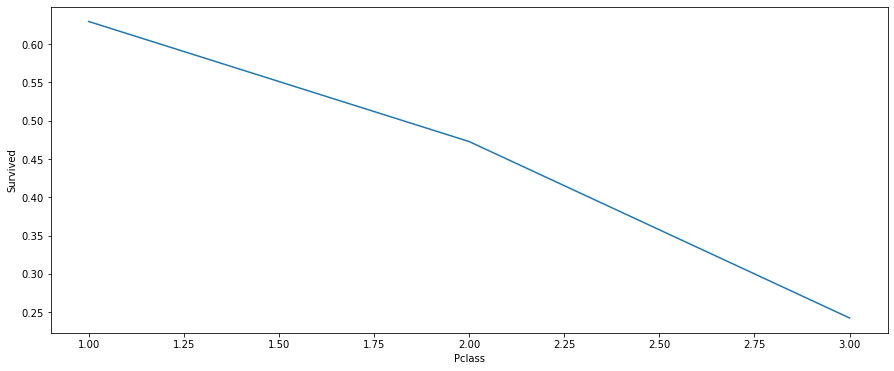

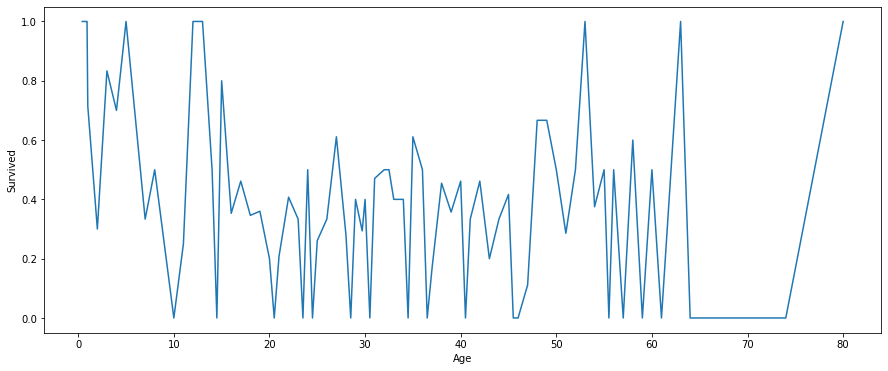

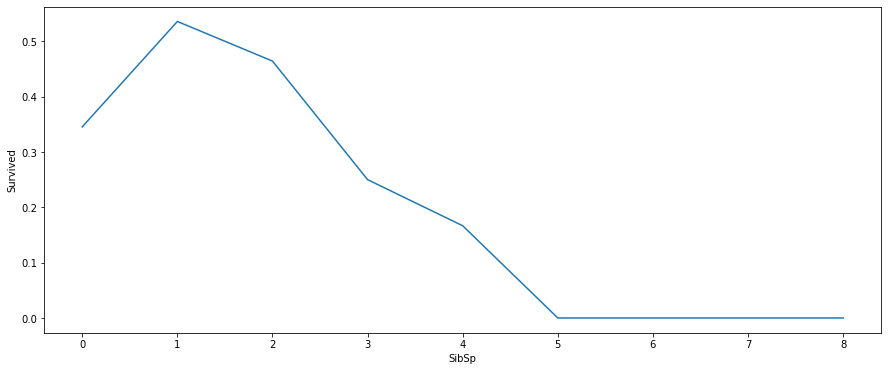

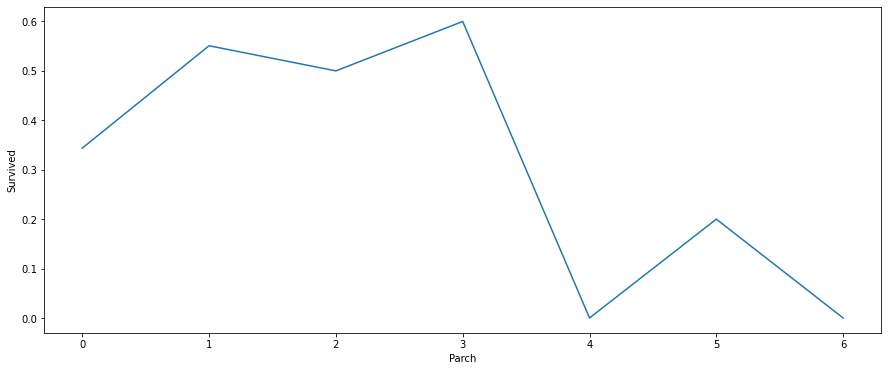

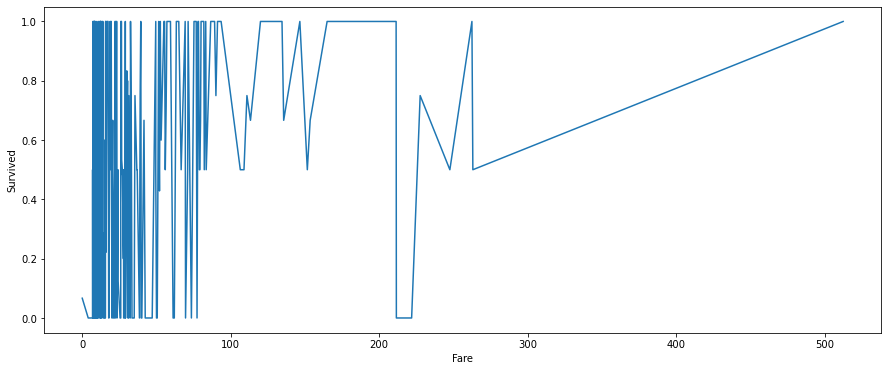

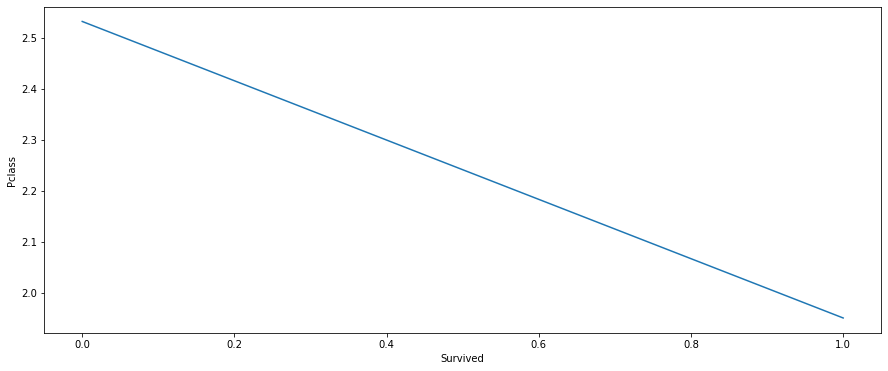

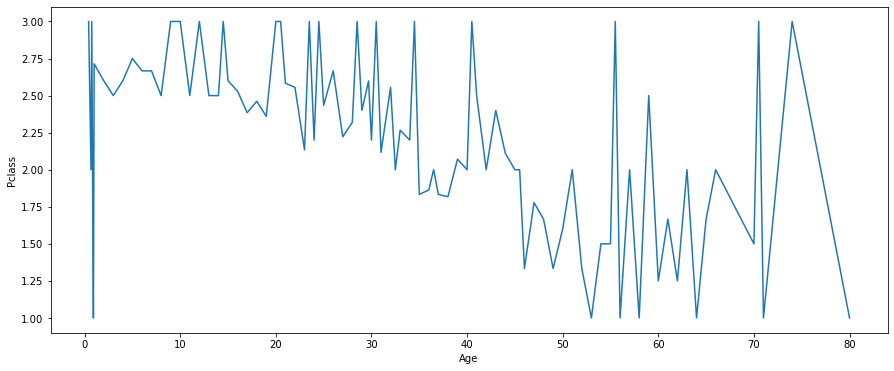

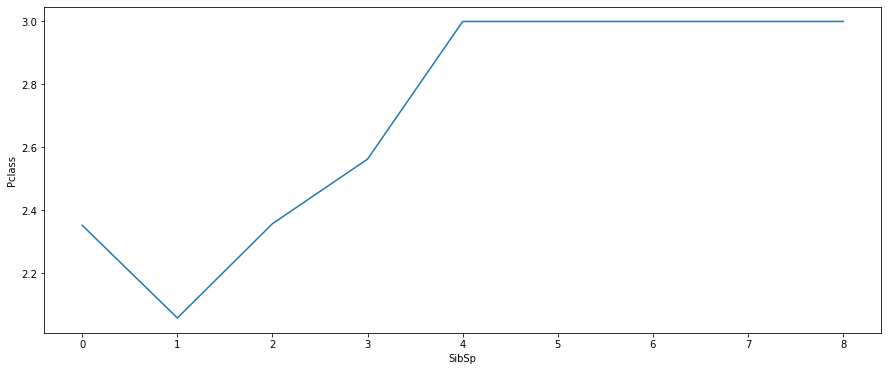

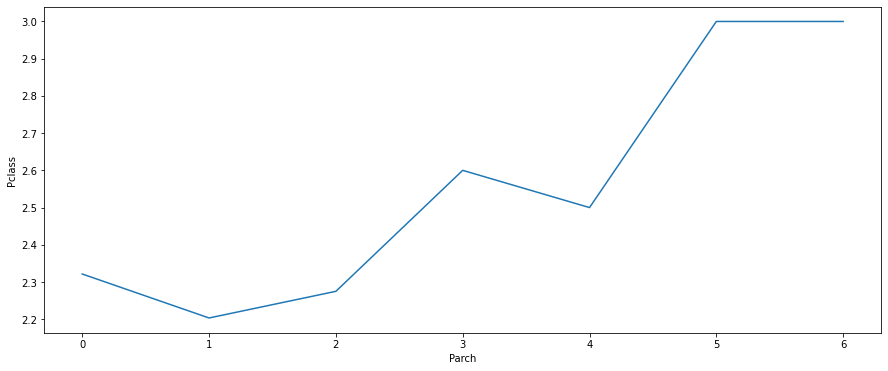

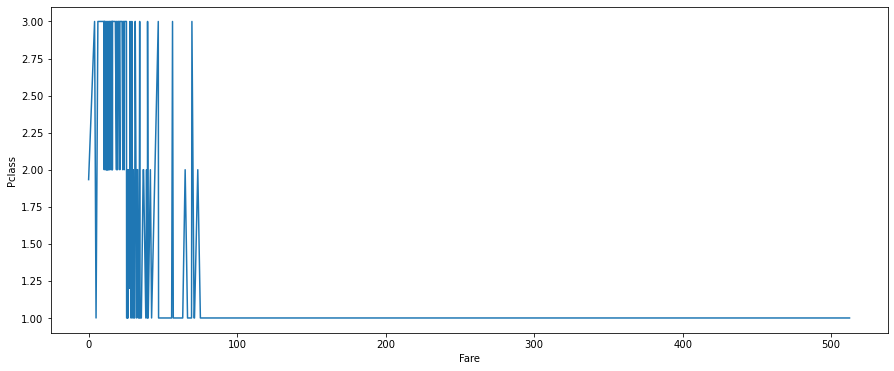

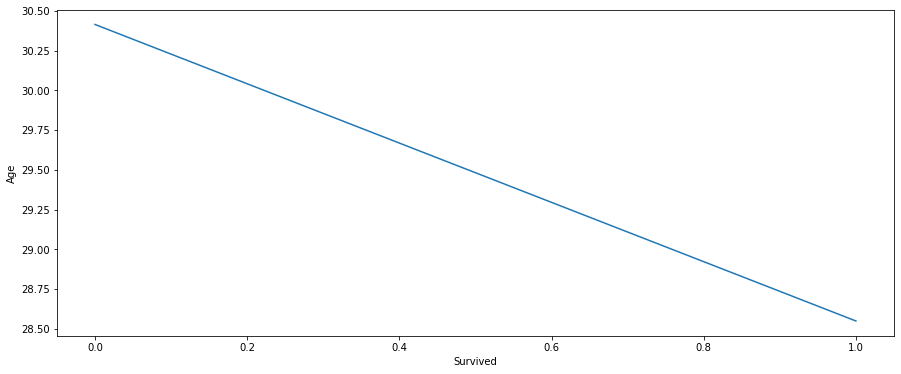

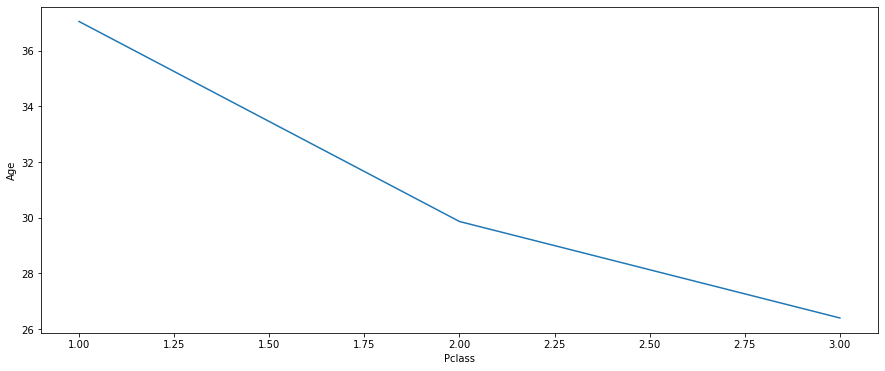

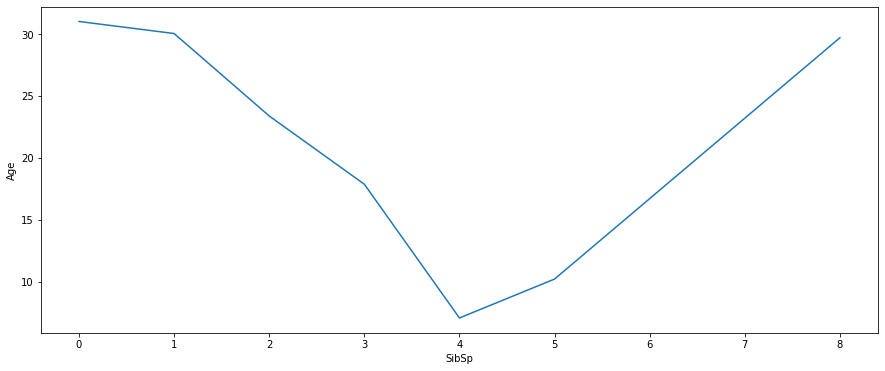

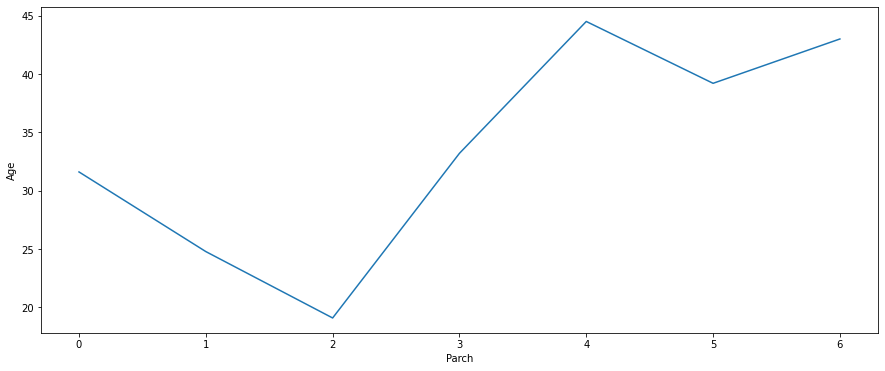

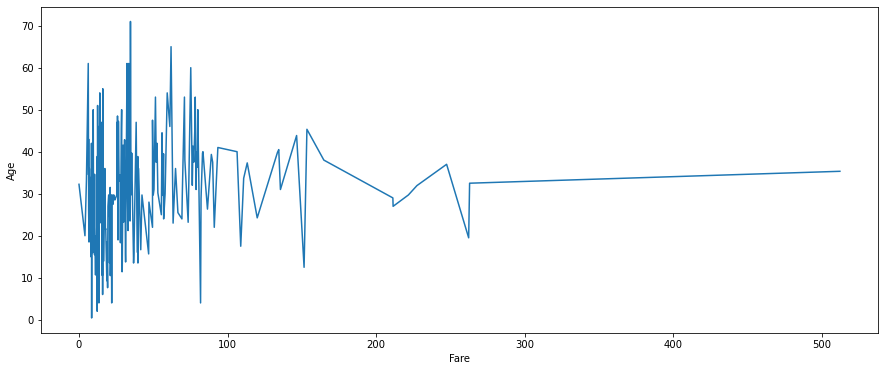

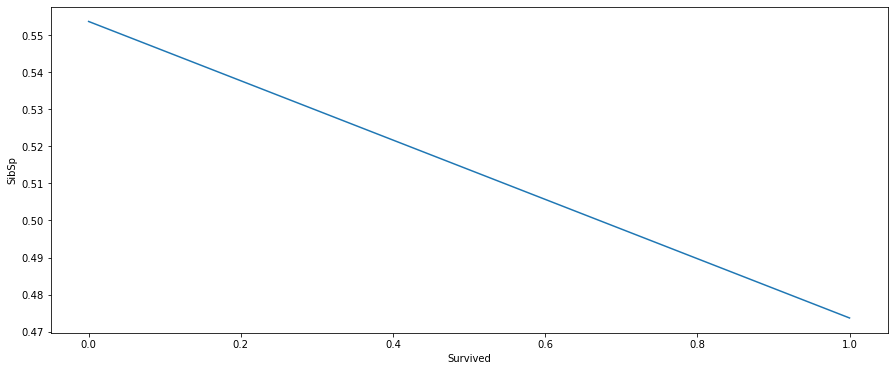

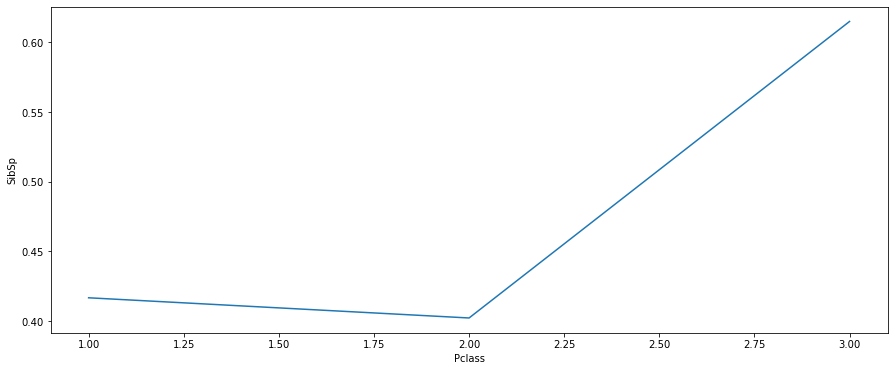

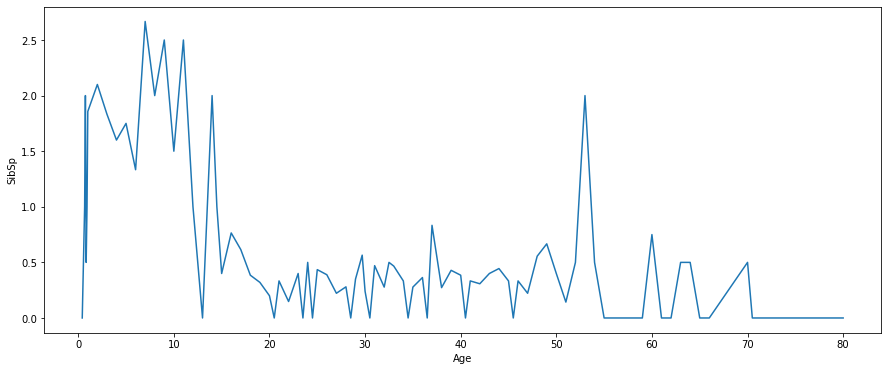

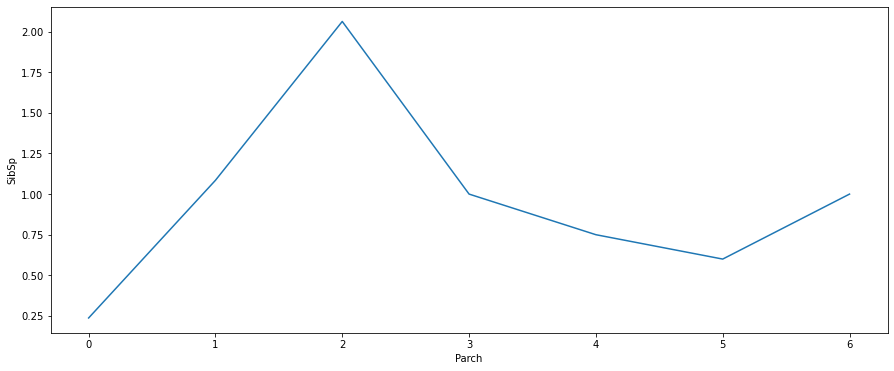

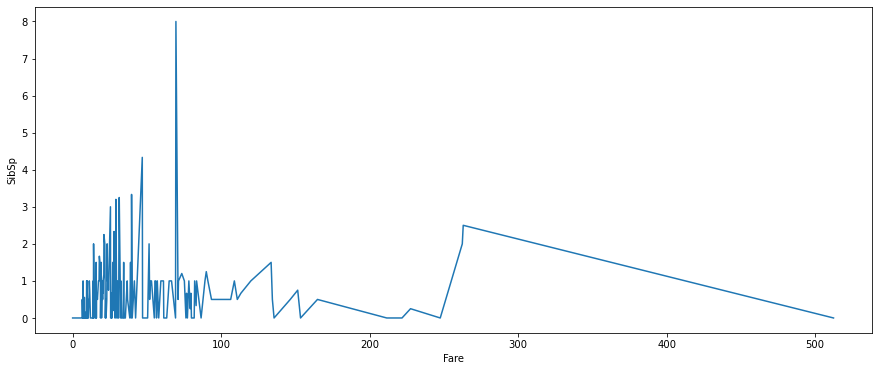

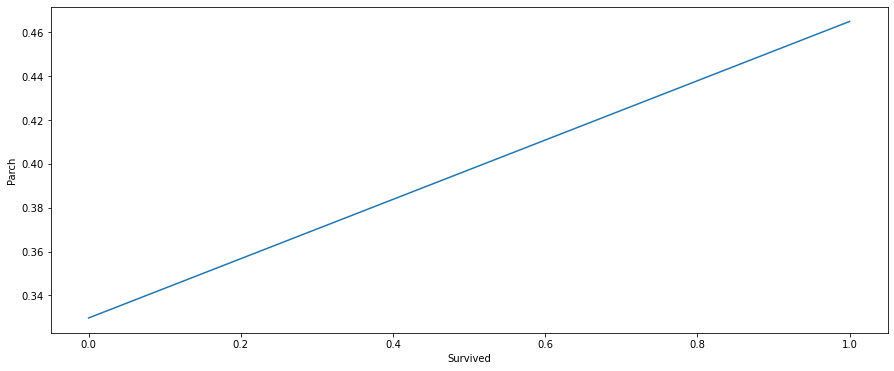

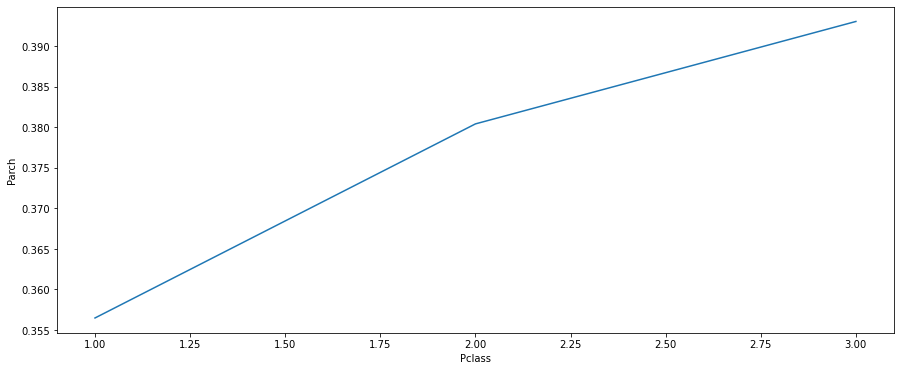

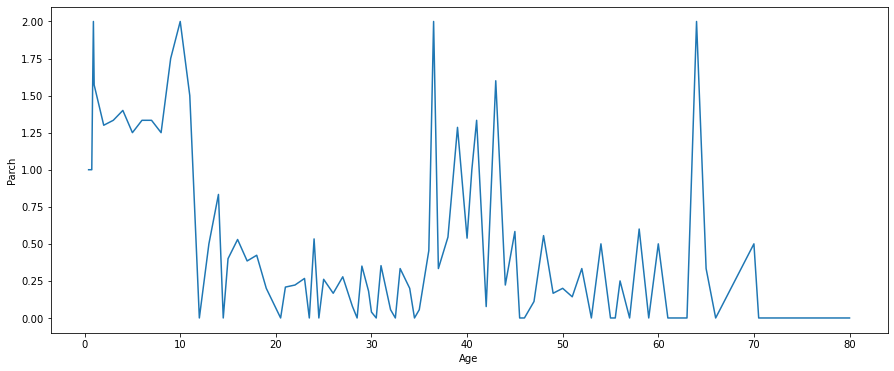

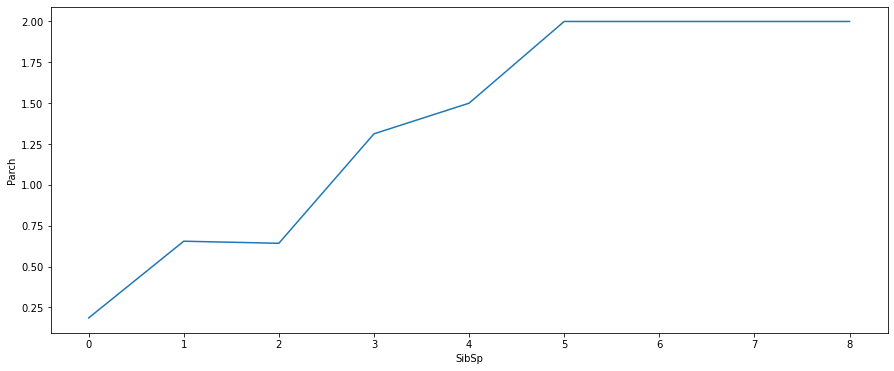

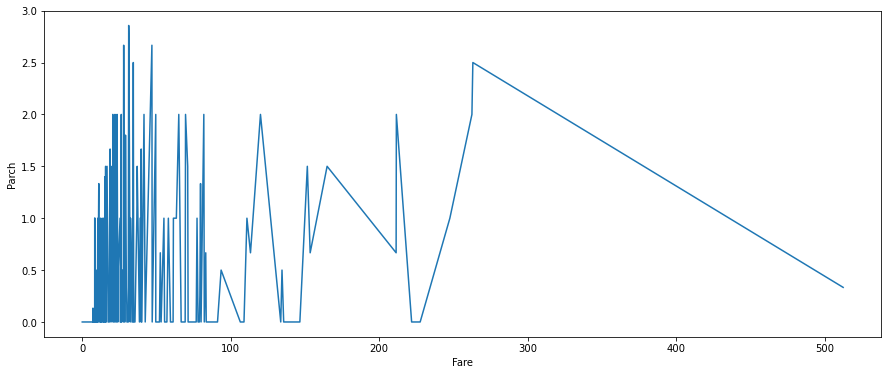

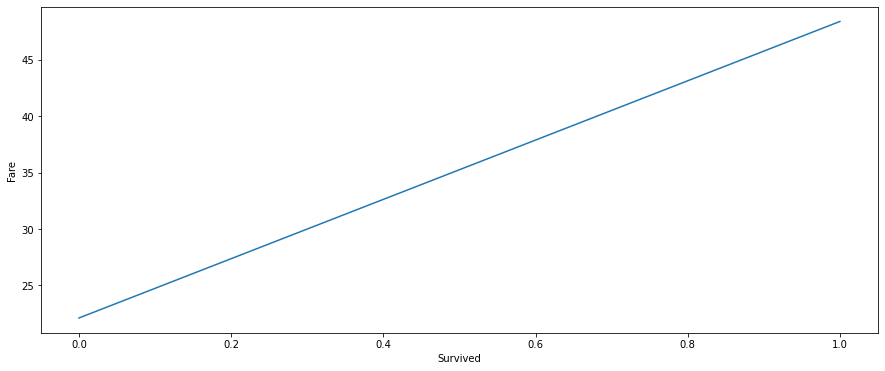

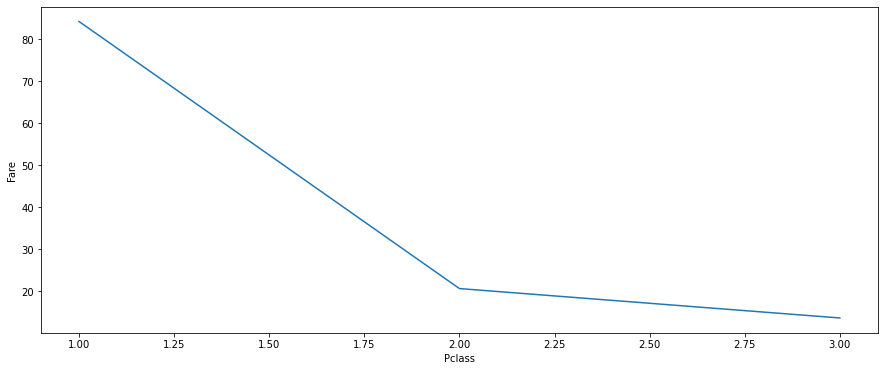

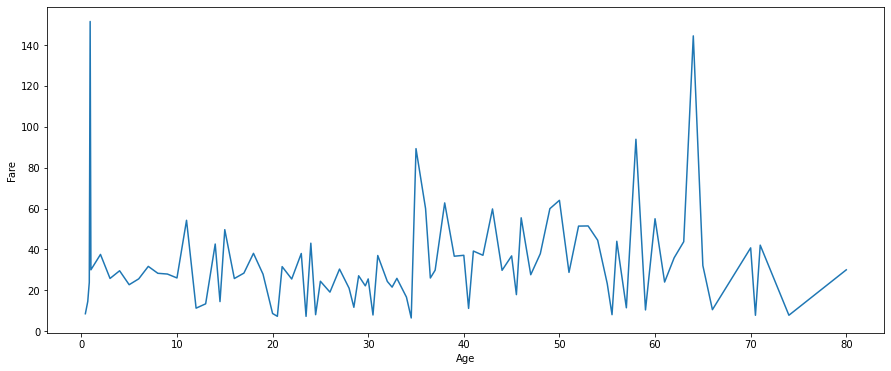

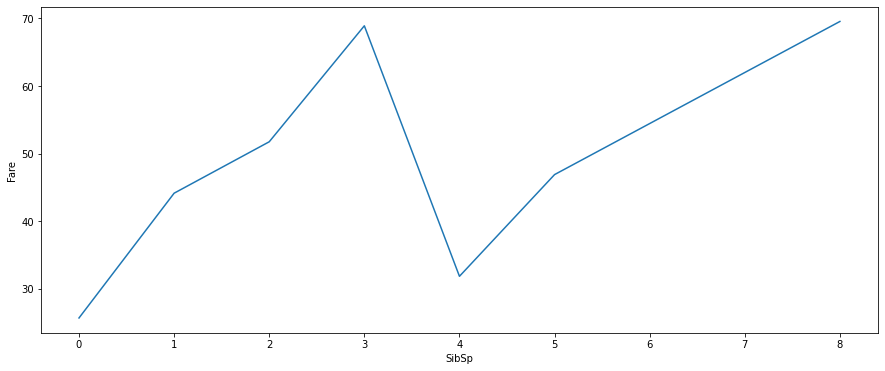

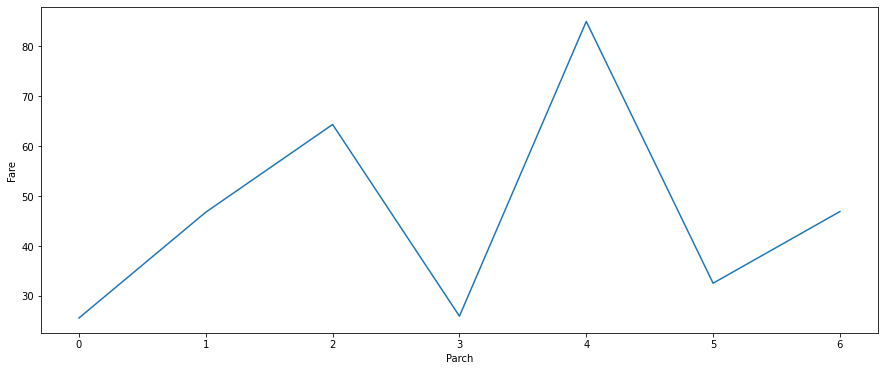

In [69]:
for i in numerical_columns:
    for j in numerical_columns:
        if i !=j:
            plt.figure(figsize=(15,6))
            sns.lineplot(x=df[j],y=df[i],data=df,ci=None,palette='hls')
            plt.show()

In [70]:
pd.pivot_table(df,index='Survived',values=['Age','SibSp','Parch','Fare','Pclass'])

Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.415100  22.117887  0.329690  2.531876  0.553734
1         28.549778  48.395408  0.464912  1.950292  0.473684

In [74]:
df_new=df.copy()

In [75]:
 df_new.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [76]:
 df_new.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [77]:
 df_new.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [78]:
 df_new.groupby('Sex')['Pclass'].mean()

Sex
female    2.159236
male      2.389948
Name: Pclass, dtype: float64

In [80]:
df

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]

In [93]:
object_columns


['Sex', 'Embarked']

In [96]:
df = pd.get_dummies(df_new,columns=object_columns, drop_first= True)

In [97]:
df

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0           0       3  22.000000      1      0   7.2500         1           0   
1           1       1  38.000000      1      0  71.2833         0           0   
2           1       3  26.000000      0      0   7.9250         0           0   
3           1       1  35.000000      1      0  53.1000         0           0   
4           0       3  35.000000      0      0   8.0500         1           0   
..        ...     ...        ...    ...    ...      ...       ...         ...   
886         0       2  27.000000      0      0  13.0000         1           0   
887         1       1  19.000000      0      0  30.0000         0           0   
888         0       3  29.699118      1      2  23.4500         0           0   
889         1       1  26.000000      0      0  30.0000         1           0   
890         0       3  32.000000      0      0   7.7500         1           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

In [98]:
corr=df.corr()

In [99]:
corr

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500   
Age        -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566   
SibSp      -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000   
Sex_male   -0.543351  0.131900  0.084153 -0.114631 -0.245489 -0.182333   
Embarked_Q  0.003650  0.221009 -0.013855 -0.026354 -0.081228 -0.117216   
Embarked_S -0.149683  0.074053 -0.019336  0.068734  0.060814 -0.162184   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -0.543351    0.003650   -0.149683  
Pclass      0.131900    0.221009    0.074053  
Age         0.084153   -0.013855   -0.019336  
SibSp      -0.114631   -0.026354    0.068734  
Parch      -0.245489   -0.081228    0.060814  
Fare       -0.182333   -0.117216   -0.162184  
Sex_male    1.000000   -0.074115    0.119224  
Embarked_Q -0.074115    1.000000   -0.499421  
Embarked_S  0.119224   -0.499421    1.000000

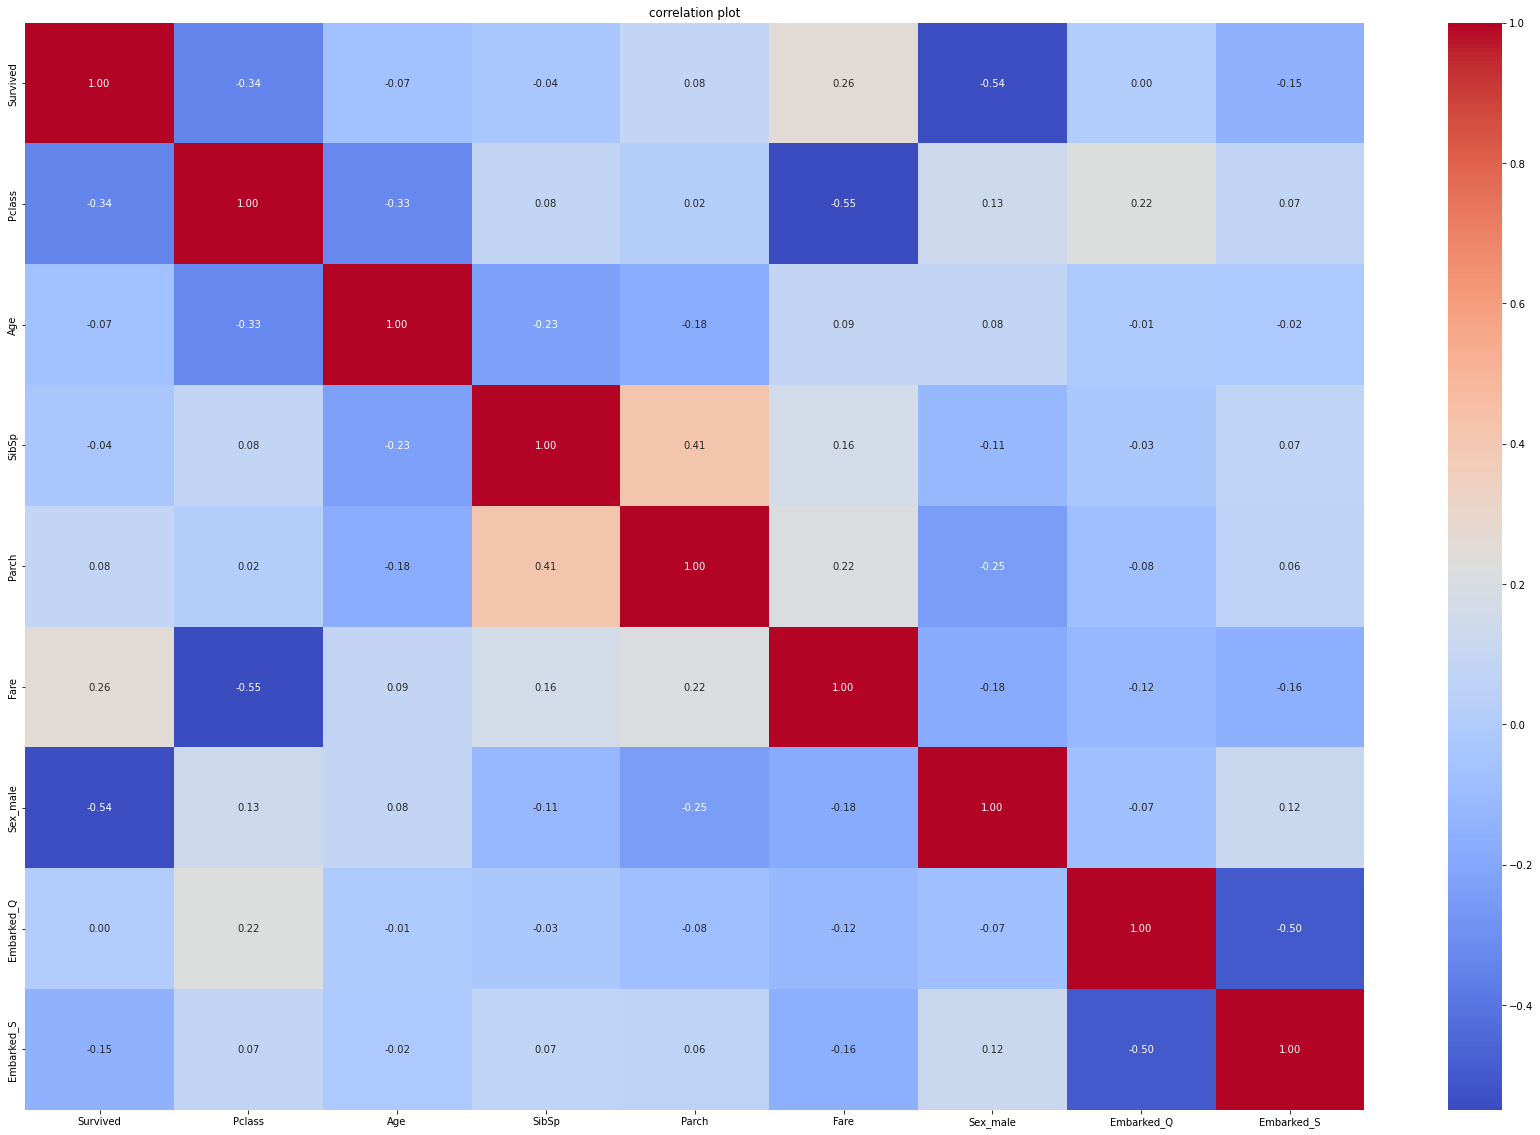

In [100]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation plot")
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [111]:
columns_to_scale=['Age','Fare']

In [113]:
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [114]:
df

Survived  Pclass           Age  SibSp  Parch      Fare  Sex_male  \
0           0       3 -5.924806e-01      1      0 -0.502445         1   
1           1       1  6.387890e-01      1      0  0.786845         0   
2           1       3 -2.846632e-01      0      0 -0.488854         0   
3           1       1  4.079260e-01      1      0  0.420730         0   
4           0       3  4.079260e-01      0      0 -0.486337         1   
..        ...     ...           ...    ...    ...       ...       ...   
886         0       2 -2.077088e-01      0      0 -0.386671         1   
887         1       1 -8.233437e-01      0      0 -0.044381         0   
888         0       3 -2.232906e-16      1      2 -0.176263         0   
889         1       1 -2.846632e-01      0      0 -0.044381         1   
890         0       3  1.770629e-01      0      0 -0.492378         1   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 9 columns]

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [116]:
df

Survived  Pclass           Age  SibSp  Parch      Fare  Sex_male  \
0           0       3 -5.924806e-01      1      0 -0.502445         1   
1           1       1  6.387890e-01      1      0  0.786845         0   
2           1       3 -2.846632e-01      0      0 -0.488854         0   
3           1       1  4.079260e-01      1      0  0.420730         0   
4           0       3  4.079260e-01      0      0 -0.486337         1   
..        ...     ...           ...    ...    ...       ...       ...   
886         0       2 -2.077088e-01      0      0 -0.386671         1   
887         1       1 -8.233437e-01      0      0 -0.044381         0   
888         0       3 -2.232906e-16      1      2 -0.176263         0   
889         1       1 -2.846632e-01      0      0 -0.044381         1   
890         0       3  1.770629e-01      0      0 -0.492378         1   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 9 columns]

In [117]:
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [118]:
df

Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3  0.271174      1      0  0.014151         1           0   
1           1       1  0.472229      1      0  0.139136         0           0   
2           1       3  0.321438      0      0  0.015469         0           0   
3           1       1  0.434531      1      0  0.103644         0           0   
4           0       3  0.434531      0      0  0.015713         1           0   
..        ...     ...       ...    ...    ...       ...       ...         ...   
886         0       2  0.334004      0      0  0.025374         1           0   
887         1       1  0.233476      0      0  0.058556         0           0   
888         0       3  0.367921      1      2  0.045771         0           0   
889         1       1  0.321438      0      0  0.058556         1           0   
890         0       3  0.396833      0      0  0.015127         1           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
886           1  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

In [121]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [132]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [133]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [134]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [135]:
y_pred = logreg.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
log_score=accuracy_score(y_test,y_pred)

In [139]:
print(log_score)

0.8044692737430168


In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dt_model=DecisionTreeClassifier()

In [150]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
y_pred_dt=dt_model.predict(X_test)

In [152]:
dt_score=accuracy_score(y_test,y_pred_dt)

In [153]:
dt_score

0.8044692737430168